![Image of churn](https://d2mkz4zdclmlek.cloudfront.net/images/articles/what-is-customer-churn.png)

In [1615]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_score, roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve, accuracy_score, make_scorer,auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

In [1616]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Task 1: Reading and Inspection

-  ### Subtask 1.1 : Import and read


In [1617]:
telcom = pd.read_csv("telecom_churn_data.csv")
telcom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [1618]:
# making mobile numbers as row index

telcom.set_index("mobile_number",inplace=True)
telcom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,N

-  ### Subtask 1.2 : Inspect the dataframe

In [1619]:
# checking for shape of the data
telcom.shape

(99999, 225)

we have data of 99999 telcoms.

we have 226 columns describing each telcom.

In [1620]:
# checking for columns
telcom.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=225)

In [1621]:
# checking for vaariable information
telcom.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 225 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   circle_id                 99999 non-null  int64  
 1   loc_og_t2o_mou            98981 non-null  float64
 2   std_og_t2o_mou            98981 non-null  float64
 3   loc_ic_t2o_mou            98981 non-null  float64
 4   last_date_of_month_6      99999 non-null  object 
 5   last_date_of_month_7      99398 non-null  object 
 6   last_date_of_month_8      98899 non-null  object 
 7   last_date_of_month_9      98340 non-null  object 
 8   arpu_6                    99999 non-null  float64
 9   arpu_7                    99999 non-null  float64
 10  arpu_8                    99999 non-null  float64
 11  arpu_9                    99999 non-null  float64
 12  onnet_mou_6               96062 non-null  float64
 13  onnet_mou_7               96140 non-null  floa

In [1622]:
# checking for duplicate entries
telcom.duplicated().sum()

0

No Duplicate values found.

In [1623]:
# checking for statastical information
telcom.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.

## Task 2: Handling Missing Data

-  ### Subtask 2.1 : checking for missing values

In [1624]:
# checking for missing values in data
round(telcom.isnull().mean().sort_values(ascending=False)*100,2)

count_rech_2g_6             74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
count_rech_3g_6             74.85
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
total_rech_dat

from above we can see that there many variables having missing values. lets check them one by one and lets see if we can find suitable imputation.

-  ### Subtask 2.1 : Impute with zero when you are very sure that a missing is a zero.

- From above missing value information we can see that, there are no missing values for number of talktime recharge, amount of talktime recharege, arpu of 4 months, maximum talktime recharege, avg talktime recharege.


- But incase of **data recharge** there are some missing values. lets check for them.

In [1625]:
#function to impute zeros

def impute_zeros(month:int):
    
    x = str(month)
    cols = ["count_rech_2g","count_rech_3g","total_rech_data","max_rech_data","av_rech_amt_data",
            "arpu_3g","arpu_2g"]
    
    for i in cols:
        telcom[i + "_" + x] = telcom[i + "_" + x].fillna(0)

## for 6th month

In [1626]:
# inspecting data recharge for month 6  

count_data_rech_6_cols = ["count_rech_2g_6","count_rech_3g_6"]
other_data_6_cols = ["total_rech_data_6","max_rech_data_6","av_rech_amt_data_6",
                     "arpu_3g_6","arpu_2g_6"]

In [1627]:
# checkig for when 2g & 3g data recharege count is null, what is the effect on the total data recharege,
# maximum recharge, average amount of reharge , ARPU for 2g and 3g in 6th month.

inspecting_null_6=telcom[(telcom["count_rech_2g_6"].isnull()) & (telcom["count_rech_3g_6"].isnull())][other_data_6_cols]

In [1628]:
# checkig inspecting_null dataframe
inspecting_null_6.head()

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
mobile_number,,,,,
7001865778,NaN,NaN,NaN,NaN,NaN
7001625959,NaN,NaN,NaN,NaN,NaN
7001204172,NaN,NaN,NaN,NaN,NaN
7000286308,NaN,NaN,NaN,NaN,NaN
7001051193,NaN,NaN,NaN,NaN,NaN


In [1629]:
# checkig % null values in inspectin_null columns
inspecting_null_6.isnull().mean()*100

total_rech_data_6     100.0
max_rech_data_6       100.0
av_rech_amt_data_6    100.0
arpu_3g_6             100.0
arpu_2g_6             100.0
dtype: float64

In [1630]:
# % missing value compare to orignal dataframe
round((inspecting_null_6.shape[0]/telcom.shape[0])*100,2)

74.85

##### as we can see here when count of 2g and 3g is null, total data recharege, maximum recharge, average amount of reharge , ARPU for 2g and 3g in 6th month are also 100% null.

#####  amount of missing percent is excatly 74.85% as we seen before. 

- **so these users do not use data services of the company(2g and 3g). we can safely impute these null values to zero.**

## for 7th month

In [1631]:
# inspecting data recharge for month 7  

count_data_rech_7_cols = ["count_rech_2g_7","count_rech_3g_7"]
other_data_7_cols = ["total_rech_data_7","max_rech_data_7","av_rech_amt_data_7",
                     "arpu_3g_7","arpu_2g_7"]

In [1632]:
# checkig for when 2g & 3g data recharege count is null, what is the effect on the total data recharege,
# maximum recharge, average amount of reharge , ARPU for 2g and 3g in 7th month.

inspecting_null_7=telcom[(telcom["count_rech_2g_7"].isnull()) & (telcom["count_rech_3g_7"].isnull())][other_data_7_cols]

In [1633]:
# checkig inspecting_null dataframe
inspecting_null_7.head()

,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7
mobile_number,,,,,
7001625959,NaN,NaN,NaN,NaN,NaN
7001204172,NaN,NaN,NaN,NaN,NaN
7000142493,NaN,NaN,NaN,NaN,NaN
7000286308,NaN,NaN,NaN,NaN,NaN
7001051193,NaN,NaN,NaN,NaN,NaN


In [1634]:
# checkig % null values in inspectin_null columns
inspecting_null_7.isnull().mean()*100

total_rech_data_7     100.0
max_rech_data_7       100.0
av_rech_amt_data_7    100.0
arpu_3g_7             100.0
arpu_2g_7             100.0
dtype: float64

In [1635]:
# % missing value compare to orignal dataframe
round((inspecting_null_7.shape[0]/telcom.shape[0])*100,2)

74.43

##### as we can see here when count of 2g and 3g is null, total data recharege, maximum recharge, average amount of reharge , ARPU for 2g and 3g in 7th month are also 100% null.

#####  amount of missing percent is excatly 74.43% as we seen before. 

- **so these users do not use data services of the company(2g and 3g). we can safely impute these null values to zero.**


## for 8th month

In [1636]:
# inspecting data recharge for month 6  

count_data_rech_8_cols = ["count_rech_2g_8","count_rech_3g_8"]
other_data_8_cols = ["total_rech_data_8","max_rech_data_8","av_rech_amt_data_8",
                     "arpu_3g_8","arpu_2g_8"]

In [1637]:
# checkig for when 2g & 3g data recharege count is null, what is the effect on the total data recharege,
# maximum recharge, average amount of reharge , ARPU for 2g and 3g in 8th month.

inspecting_null_8=telcom[(telcom["count_rech_2g_8"].isnull()) & (telcom["count_rech_3g_8"].isnull())][other_data_8_cols]

In [1638]:
# checkig inspecting_null dataframe
inspecting_null_8.head()

,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8
mobile_number,,,,,
7001625959,NaN,NaN,NaN,NaN,NaN
7001204172,NaN,NaN,NaN,NaN,NaN
7000142493,NaN,NaN,NaN,NaN,NaN
7000286308,NaN,NaN,NaN,NaN,NaN
7001051193,NaN,NaN,NaN,NaN,NaN


In [1639]:
# checkig % null values in inspectin_null columns
inspecting_null_8.isnull().mean()*100

total_rech_data_8     100.0
max_rech_data_8       100.0
av_rech_amt_data_8    100.0
arpu_3g_8             100.0
arpu_2g_8             100.0
dtype: float64

In [1640]:
# % missing value compare to orignal dataframe
round((inspecting_null_8.shape[0]/telcom.shape[0])*100,2)

73.66

##### as we can see here when count of 2g and 3g is null, total data recharege, maximum recharge, average amount of reharge , ARPU for 2g and 3g in 8th month are also 100% null.

#####  amount of missing percent is excatly 73.66% as we seen before. 

- **so these users do not use data services of the company(2g and 3g). we can safely impute these null values to zero.**

## for 9th month

In [1641]:
# inspecting data recharge for month 9  

count_data_rech_9_cols = ["count_rech_2g_9","count_rech_3g_9"]
other_data_9_cols = ["total_rech_data_9","max_rech_data_9","av_rech_amt_data_9",
                     "arpu_3g_9","arpu_2g_9"]

In [1642]:
# checkig for when 2g & 3g data recharege count is null, what is the effect on the total data recharege,
# maximum recharge, average amount of reharge , ARPU for 2g and 3g in 6th month.

inspecting_null_9=telcom[(telcom["count_rech_2g_9"].isnull()) & (telcom["count_rech_3g_9"].isnull())][other_data_9_cols]

In [1643]:
# checkig inspecting_null dataframe
inspecting_null_9.head()

,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9
mobile_number,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN
7001865778,NaN,NaN,NaN,NaN,NaN
7001204172,NaN,NaN,NaN,NaN,NaN
7000142493,NaN,NaN,NaN,NaN,NaN
7000286308,NaN,NaN,NaN,NaN,NaN


In [1644]:
# checkig % null values in inspectin_null columns
inspecting_null_9.isnull().mean()*100

total_rech_data_9     100.0
max_rech_data_9       100.0
av_rech_amt_data_9    100.0
arpu_3g_9             100.0
arpu_2g_9             100.0
dtype: float64

In [1645]:
# % missing value compare to orignal dataframe
round((inspecting_null_9.shape[0]/telcom.shape[0])*100,2)

74.08

##### as we can see here when count of 2g and 3g is null, total data recharege, maximum recharge, average amount of reharge , ARPU for 2g and 3g in 9th month are also 100% null.

#####  amount of missing percent is excatly 74.08% as we seen before. 

- **so these users do not use data services of the company(2g and 3g). we can safely impute these null values to zero.**

In [1646]:
# imputing zeros in 6th,7th,8th,9th month

impute_zeros(6)
impute_zeros(7)
impute_zeros(8)
impute_zeros(9)

## from data we can observe, some variables are addition of other variables

In [1647]:
# lets inspect for the 6th month data of std incomming calls

std_inc = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 
           'std_ic_t2o_mou_6','std_ic_mou_6']

telcom[std_inc].head()

,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6
mobile_number,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN
7001865778,0.00,5.90,0.00,0.0,5.90
7001625959,72.41,45.18,21.73,0.0,139.33
7001204172,43.48,1.33,1.18,0.0,45.99
7000142493,0.00,1.93,0.00,0.0,1.93


**here we can see that std_ic_mou_6 is addition of all other std incomming variables.**

In [1648]:
# lets inspect for the 6th month data of std outgoing calls

std_out = ['std_og_t2t_mou_6','std_og_t2m_mou_6', 'std_og_t2f_mou_6', 
           'std_og_t2c_mou_6','std_og_mou_6']

telcom[std_out].head()

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6
mobile_number,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN
7001865778,0.23,0.00,0.00,0.0,0.23
7001625959,4.34,41.81,1.48,0.0,47.64
7001204172,26.23,2.99,0.00,0.0,29.23
7000142493,0.00,9.31,0.00,0.0,9.31


**here we can see that std_og_mou_6 is addition of all other std outgoing variables.**

In [1649]:
# lets inspect for the 6th month data of local incomming calls

loc_inc = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6','loc_ic_mou_6']

telcom[loc_inc].head()

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
mobile_number,,,,
7000842753,NaN,NaN,NaN,NaN
7001865778,1.61,17.48,0.00,19.09
7001625959,115.69,14.38,99.48,229.56
7001204172,62.08,113.96,57.43,233.48
7000142493,105.68,106.84,1.50,214.03


**here we ca see that loc_ic_mou_6 is a addition of all other local incoming variable.**

In [1650]:
# # lets inspect for the 6th month data of local outgoing calls

loc_out = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
           'loc_og_t2c_mou_6','loc_og_mou_6',]
telcom[loc_out].head()

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6
mobile_number,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN
7001865778,23.88,11.51,0.00,0.0,35.39
7001625959,7.19,29.34,24.11,0.0,60.66
7001204172,73.68,107.43,1.91,0.0,183.03
7000142493,50.31,67.64,0.00,0.0,117.96


**here we ca see that loc_og_mou_6 is a addition of all other local outgoing variable.**

In [1651]:
# now lets look fot the total incomming minutes of usage for the 6th month
# it is the addition of all other incomming minutes of usage variable.

inc_6 = ['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6',
         'isd_ic_mou_6','ic_others_6','spl_ic_mou_6',]

telcom[inc_6].head(5)

,total_ic_mou_6,loc_ic_mou_6,std_ic_mou_6,isd_ic_mou_6,ic_others_6,spl_ic_mou_6
mobile_number,,,,,,
7000842753,0.00,NaN,NaN,NaN,NaN,NaN
7001865778,26.83,19.09,5.90,1.83,0.00,0.00
7001625959,370.04,229.56,139.33,0.00,0.93,0.21
7001204172,280.08,233.48,45.99,0.00,0.00,0.59
7000142493,216.44,214.03,1.93,0.00,0.48,0.00


**here we ca see that, total_ic_mou_6 is the addition of all other incomming minutes of usage variable.**

In [1652]:
# now lets look fot the total outgoing minutes of usage for the 6th month
# it is the addition of all other outgoing minutes of usage variable.

out_6 = ['total_og_mou_6','loc_og_mou_6','std_og_mou_6',
         'isd_og_mou_6','og_others_6','spl_og_mou_6',]

telcom[out_6].head()

,total_og_mou_6,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,og_others_6,spl_og_mou_6
mobile_number,,,,,,
7000842753,0.00,NaN,NaN,NaN,NaN,NaN
7001865778,40.31,35.39,0.23,0.0,0.00,4.68
7001625959,155.33,60.66,47.64,0.0,0.45,46.56
7001204172,223.23,183.03,29.23,0.0,0.00,10.96
7000142493,127.28,117.96,9.31,0.0,0.00,0.00


**here we ca see that, total_og_mou_6 is the addition of all other outgoing minutes of usage variable.**

#### From above we can see that for some customers total minutes of usage is zero, so there different variables must be equal to zero. so we can safely impute zero to null values here. and we can apply same procedure to 7th,8th,9th month also.

In [1653]:
#function to impute zeros

def impute_zero(month:int):
    
    x = str(month)
    cols = ['std_ic_t2t_mou','std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou',
            'std_ic_mou','std_og_t2t_mou','std_og_t2m_mou', 'std_og_t2f_mou', 
            'std_og_t2c_mou','std_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou', 
            'loc_ic_t2f_mou', 'loc_ic_mou','loc_og_t2t_mou','loc_og_t2m_mou', 
            'loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','total_ic_mou',
            'loc_ic_mou','std_ic_mou','isd_ic_mou','ic_others','spl_ic_mou',
            'total_og_mou','loc_og_mou','std_og_mou','isd_og_mou','og_others','spl_og_mou']
    
    for i in cols:
        telcom[i + "_" + x] = telcom[i + "_" + x].fillna(0)

In [1654]:
# imputing zeros in 6th,7th,8th,9th month

impute_zero(6)
impute_zero(7)
impute_zero(8)
impute_zero(9)

In [1655]:
# checking for changes in missing values
round(telcom.isnull().mean().sort_values(ascending=False)*100,2)

date_of_last_rech_data_6    74.85
night_pck_user_6            74.85
fb_user_6                   74.85
night_pck_user_7            74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
fb_user_8                   73.66
date_of_last_rech_data_8    73.66
night_pck_user_8            73.66
roam_ic_mou_9                7.75
onnet_mou_9                  7.75
roam_og_mou_9                7.75
offnet_mou_9                 7.75
onnet_mou_8                  5.38
roam_ic_mou_8                5.38
offnet_mou_8                 5.38
roam_og_mou_8                5.38
date_of_last_rech_9          4.76
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
onnet_mou_6                  3.94
roam_og_mou_6                3.94
roam_og_mou_7                3.86
offnet_mou_7                 3.86
onnet_mou_7                  3.86
roam_ic_mou_7                3.86
date_of_last_r

-  ### Subtask 2.2 : checking for categorical variables

In [1656]:
# categorical columns present in the data
cat_cols = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9",
           "fb_user_6","fb_user_7","fb_user_8","fb_user_9"]

In [1657]:
# as the missing values of above categorical variables is high, around 74%.
# lets create new category of -1.

telcom[cat_cols] = telcom[cat_cols].apply(lambda x : x.fillna(-1))

In [1658]:
# checking for changes in missing values.
round(telcom.isnull().mean().sort_values(ascending=False)*100,2)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
roam_ic_mou_9                7.75
onnet_mou_9                  7.75
offnet_mou_9                 7.75
roam_og_mou_9                7.75
offnet_mou_8                 5.38
roam_og_mou_8                5.38
onnet_mou_8                  5.38
roam_ic_mou_8                5.38
date_of_last_rech_9          4.76
roam_og_mou_6                3.94
onnet_mou_6                  3.94
roam_ic_mou_6                3.94
offnet_mou_6                 3.94
roam_ic_mou_7                3.86
roam_og_mou_7                3.86
offnet_mou_7                 3.86
onnet_mou_7                  3.86
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
loc_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
std_og_t2o_mou               1.02
last_date_of_m

-  ### Subtask 2.3 : handling high missing percentage variables

In [1659]:
# from above we can see that some date variables having a high % of missing values.
# also droping other date and id columns which not required for analysis

# date columns
date_cols = telcom.columns[telcom.columns.str.contains('date')]
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [1660]:
# id columns
id_cols = ["circle_id"]

In [1661]:
telcom = telcom.drop(date_cols,axis=1)  # dropping date columns
telcom = telcom.drop(id_cols,axis=1)   # droping id column

print(telcom.shape)  # checking for changes
telcom.head()

(99999, 212)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1

In [1662]:
# checking for changes in missing values
round(telcom.isnull().mean().sort_values(ascending=False)*100,2)

roam_og_mou_9         7.75
roam_ic_mou_9         7.75
onnet_mou_9           7.75
offnet_mou_9          7.75
roam_og_mou_8         5.38
roam_ic_mou_8         5.38
onnet_mou_8           5.38
offnet_mou_8          5.38
roam_og_mou_6         3.94
roam_ic_mou_6         3.94
onnet_mou_6           3.94
offnet_mou_6          3.94
roam_og_mou_7         3.86
roam_ic_mou_7         3.86
onnet_mou_7           3.86
offnet_mou_7          3.86
loc_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
std_og_t2o_mou        1.02
isd_og_mou_9          0.00
og_others_8           0.00
loc_ic_t2t_mou_8      0.00
loc_ic_t2t_mou_7      0.00
loc_ic_t2t_mou_6      0.00
total_og_mou_9        0.00
total_og_mou_8        0.00
total_og_mou_7        0.00
total_og_mou_6        0.00
og_others_9           0.00
og_others_6           0.00
og_others_7           0.00
isd_og_mou_8          0.00
spl_og_mou_9          0.00
spl_og_mou_8          0.00
spl_og_mou_7          0.00
spl_og_mou_6          0.00
isd_og_mou_6          0.00
l

-  ### Subtask 2.4 : Imputing remaining missing values.

In [1663]:
# lets find out columns where missin values are still present

missing_cols = telcom.columns[telcom.isnull().any()]
missing_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [1664]:
# checking for statastical information
telcom[missing_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519
std,0.0,0.0,0.0,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000


**data looks skewed, lets impute median inplace of missing values.**

In [1665]:
# creating a function to fill missing values with median value

def median_impute(columns):
    
    for x in columns:
        telcom[x].fillna(value = telcom[x].median(), inplace=True)

In [1666]:
# imputing missing values with median value

median_impute(missing_cols)

In [1667]:
# creating a copy of imputed dataframe
telcom_clean = telcom.copy()
telcom_clean.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,

In [1668]:
telcom_clean.shape

(99999, 212)

In [1669]:
# checking for changes in missing values
round(telcom_clean.isnull().mean().sort_values(ascending=False)*100,2)

sep_vbc_3g            0.0
total_og_mou_9        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
jun_vbc_3g            0.0
loc_ic_t2t_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9

**so, here we can see there is no missig value present in the data set.**

## Task 3: Filter high-value customers(HVC)

### Good Phase

In [1670]:
# lets first of all create a copy of imputed data, so if aything goes wrong
# we do not have to repeat the same steps again.

telcom_df = telcom_clean.copy()
telcom_df.set_index(telcom.index,inplace=True)
print(telcom_df.shape)
telcom_df.head()

(99999, 212)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,

**The Pareto principle states that, for many events, roughly 80% of the effects come from 20% of the causes.**

- so, we need to find out our high valued customers based on good phase period, which is 6th and 7th month.

-  ### Subtask 3.1 : Calculate total data recharge amount

In [1671]:
# calculating  total data recharege amount for 6th and 7th month
# as for data recharge we have average column, to calulate total amount
# we need to multilpy total numerbers to average amount

telcom_df['total_data_rech_6'] = telcom_df.total_rech_data_6 * telcom_df.av_rech_amt_data_6
telcom_df['total_data_rech_7'] = telcom_df.total_rech_data_7 * telcom_df.av_rech_amt_data_7

-  ### Subtask 3.2 : calculate total recharge amount

In [1672]:
# adding data and talktime recharge of 6th and 7th month to calculate total recharge amount

telcom_df['total_amt_6'] = telcom_df.total_rech_amt_6 + telcom_df.total_data_rech_6
telcom_df['total_amt_7'] = telcom_df.total_rech_amt_7 + telcom_df.total_data_rech_7

-  ### Subtask 3.3 : Average recharge done by customer in 6th and 7th month

In [1673]:
telcom_df["av_amt_6_7"] = (telcom_df["total_amt_6"] + telcom_df["total_amt_7"]) / 2

-  ### Subtask 3.4 : Look at the 70th percentile recharge amount

In [1674]:
# we will consider any user who is equal or above 70th percentile as a high valued customer

percentile_70 = telcom_df["av_amt_6_7"].quantile(0.7)
print(f"Average recharge amount at 70th percetile : {percentile_70}")

Average recharge amount at 70th percetile : 478.0


In [1675]:
# retaing only customers equal to or above 70th percentile

telcom_high_valued = telcom_df[telcom_df["av_amt_6_7"] >= percentile_70]
print(telcom_high_valued.shape)
telcom_high_valued.head()

(30001, 217)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,av_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0

**so, we are left with aroud 30K customers, after 70th percentile filtering.**

In [1676]:
# removing columns which we created during filtering process

telcom_high_valued = telcom_high_valued.drop(["total_data_rech_6","total_data_rech_7",
                                              "total_amt_6","total_amt_7","av_amt_6_7"], axis=1)
telcom_high_valued.shape

(30001, 212)

## Task 4: Derive Churn


### Subtask 4.1 : Calculate total incoming and outgoing minutes of usage for 9th month

In [1677]:
# 9th month is a churn phase. based on users activity in this month we will derive a target variable.

telcom_high_valued['total_call_mou_9'] = telcom_high_valued["total_ic_mou_9"] + telcom_high_valued["total_og_mou_9"]

### Subtask 4.2 : Calculate 2g and 3g data consumption for 9th month

In [1678]:
telcom_high_valued['total_internet_mb_9'] = telcom_high_valued.vol_2g_mb_9 + telcom_high_valued.vol_3g_mb_9

### Subtask 4.3 : creating churn variable

In [1679]:
##  1 = churn  0 = not churn 

telcom_high_valued["churn"] = telcom_high_valued.apply(lambda x : 1 
                                                       if ((x['total_call_mou_9']==0) and 
                                                           (x['total_internet_mb_9']==0)) else 0, 
                                                       axis=1)

In [1680]:
print(telcom_high_valued.shape)
telcom_high_valued.head()

(30001, 215)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_call_mou_9,total_internet_mb_9,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,

In [1681]:
# deleting additionally created variables

telcom_high_valued.drop(["total_call_mou_9","total_internet_mb_9"],axis=1,inplace=True)
telcom_high_valued.shape

(30001, 213)

In [1682]:
# checking data type of target variable
telcom_high_valued["churn"].dtype

dtype('int64')

In [1683]:
# making churn variable  categorical 
telcom_high_valued["churn"] = telcom_high_valued["churn"].astype("category")
telcom_high_valued["churn"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### Subtask 4.4 : Check Churn percentage

In [1684]:
#checking churn percentage

100*(telcom_high_valued["churn"].value_counts(normalize=True))

0    91.863605
1     8.136395
Name: churn, dtype: float64

**according our finding 8.13% customers will churn, target variable is highly imbalanced.**

### Subtask 4.5 : Delete columns that belong to the churn month

In [1685]:
# finding out all the columns of the 9th month

col_9 = telcom_high_valued.columns[telcom_high_valued.columns.str.contains('9')]
print(len(col_9))
col_9

51


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user

we have 51 variables associated with 9th month, lets remove them.

In [1686]:
# lets remove 9th month data completely from our analysis

telcom_high_valued.drop(col_9, axis=1, inplace=True)
telcom_high_valued.drop("sep_vbc_3g",axis=1,inplace=True)
print(telcom_high_valued.shape)
telcom_high_valued.head()

(30001, 161)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,

## Removing unnecessary variables

In [1687]:
# creating new copy og data
telcom_removed = telcom_high_valued.copy()

In [1688]:
cols = ["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]
telcom_removed[cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,30001.0,30001.0,30001.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [1689]:
# here we can see here all the values are zero, so we can remove these variable
telcom_removed.drop(cols,axis=1 , inplace= True)
telcom_removed.shape

(30001, 158)

In [1690]:
# we have already seen that, some variables are addition of other variables
# so other variable will be unnecessary

# for 6th month 
# total_og_mou_6 is a grand addition of local + std + isd + special call + other calls

total_og_mou_6_col = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6','loc_og_t2f_mou_6', 
                      'loc_og_t2c_mou_6', 'loc_og_mou_6','std_og_t2t_mou_6', 'std_og_t2m_mou_6', 
                      'std_og_t2f_mou_6','std_og_t2c_mou_6', 'std_og_mou_6','isd_og_mou_6', 
                      'spl_og_mou_6','og_others_6']

telcom_removed.drop(total_og_mou_6_col, axis=1, inplace=True)

In [1691]:
telcom_removed.shape

(30001, 145)

In [1692]:
# same goes for 7th month and 8th month
total_og_mou_7_col = ['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7','loc_og_t2f_mou_7', 
                      'loc_og_t2c_mou_7', 'loc_og_mou_7','std_og_t2t_mou_7', 'std_og_t2m_mou_7', 
                      'std_og_t2f_mou_7','std_og_t2c_mou_7', 'std_og_mou_7','isd_og_mou_7', 
                      'spl_og_mou_7','og_others_7']

total_og_mou_8_col = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8','loc_og_t2f_mou_8', 
                      'loc_og_t2c_mou_8', 'loc_og_mou_8','std_og_t2t_mou_8', 'std_og_t2m_mou_8', 
                      'std_og_t2f_mou_8','std_og_t2c_mou_8', 'std_og_mou_8','isd_og_mou_8', 
                      'spl_og_mou_8','og_others_8']

telcom_removed.drop(total_og_mou_7_col, axis=1, inplace=True)
telcom_removed.drop(total_og_mou_8_col, axis=1, inplace=True)

telcom_removed.shape

(30001, 119)

In [1693]:
# we have already seen that, some variables are addition of other variables
# so other variable will be unnecessary

# for 6th month 
# total_ic_mou_6 is a grand addition of local + std + isd + special call + other calls

total_ic_mou_6_col = ['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6','loc_ic_t2f_mou_6', 
                      'loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6', 
                      'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6','std_ic_mou_6',
                       'spl_ic_mou_6', 'isd_ic_mou_6','ic_others_6']

telcom_removed.drop(total_ic_mou_6_col, axis=1, inplace=True)
telcom_removed.shape

(30001, 107)

In [1694]:
# same goes for 7th month and 8th month
total_ic_mou_7_col = ['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7','loc_ic_t2f_mou_7', 
                      'loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7', 
                      'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7','std_ic_mou_7',
                       'spl_ic_mou_7', 'isd_ic_mou_7','ic_others_7']

total_ic_mou_8_col = ['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8','loc_ic_t2f_mou_8', 
                      'loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8', 
                      'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8','std_ic_mou_8',
                       'spl_ic_mou_8', 'isd_ic_mou_8','ic_others_8']

telcom_removed.drop(total_ic_mou_7_col, axis=1, inplace=True)
telcom_removed.drop(total_ic_mou_8_col, axis=1, inplace=True)

telcom_removed.shape

(30001, 83)

In [1695]:
# we also know that, total_rech_data_6 is a addition of 'count_rech_3g_6' and 'count_rech_2g_6'

data_cols_6 = ['count_rech_3g_6','count_rech_2g_6']
data_cols_7 = ['count_rech_3g_7','count_rech_2g_7']
data_cols_8 = ['count_rech_3g_8','count_rech_2g_8']

# checking total_rech_data_6 is a addition of 'count_rech_3g_6' and 'count_rech_2g_6'
telcom_removed['total_rech_data_6'].equals(telcom_removed['count_rech_3g_6']+
                                           telcom_removed['count_rech_2g_6'])


True

from above we can see that count 2g and 3g's addition creates total number of recharge variable for that month. 

In [1696]:
# lets remove for 6,7,8 month

telcom_removed.drop(data_cols_6,axis=1,inplace=True)
telcom_removed.drop(data_cols_7,axis=1,inplace=True)
telcom_removed.drop(data_cols_8,axis=1,inplace=True)

In [1697]:
telcom_removed.shape

(30001, 77)

# Data Preparation

## Task 5 : Derived variable

***as in data understanding part we learnt that, there are 3 phases of customer lifecycle.***


1. **Good phase (6th & 7th month in our case)**
    - here customer is happy with serivices, showing usual behaviour in service usage.
    
    
2. **Action Phase (8th month in our case)**
    - here customer experience starts to sore in this phase, not happy with services,showing unusual behaviour compare to good phase.
    
    
3. **Churn Phase (9th month in our case)**
    - here customer get churned.
    
    
***so, we need to take corrective measures before churn phase and within action phase. for that we need to check the behaviour of customers while transacting from good phase to action phase. if we able to findout customer with changed behaviour  we can take corrective measures before its too late.***

In [1698]:
# lets create a copy of dataframe
telcom_derived = telcom_removed.copy()
print(telcom_derived.shape)
telcom_derived.head()

(30001, 77)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.360,205.89,0.00,0.00,0.00,0.00,0.00,0.00,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,-1.0,1.0,1.0,604,40.45,51.86,0.00,0


In [1699]:
# lets first derive the total amount of data recharge for every month

telcom_derived['total_data_rech_amt_6'] = telcom_derived['total_rech_data_6']*telcom_derived['av_rech_amt_data_6']
telcom_derived['total_data_rech_amt_7'] = telcom_derived['total_rech_data_7']*telcom_derived['av_rech_amt_data_7']
telcom_derived['total_data_rech_amt_8'] = telcom_derived['total_rech_data_8']*telcom_derived['av_rech_amt_data_8']

print(telcom_derived.shape)
telcom_derived.head()

(30001, 80)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,252.0,252.0,252.0
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1,0.0,0.0,0.0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0,0.0,354.0,207.0
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0,0.0,0.0,0.0
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.360,205.89,0.00,0.00,0.00,0.00,0.00,0.00,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,-1.0,1.0,1.0,604,40.45,51.86,0.00,0,0.0,712.0,540.0


In [1700]:
# removing average recharge amount, as now we have total recharge amount

ave_cols = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

telcom_derived.drop(ave_cols, axis=1, inplace=True)
telcom_derived.shape

(30001, 77)

**to detect change in behaviour lets see the usage of the customer changes from 6th and 7th month to 8th month.**

In [1701]:
# lets define a function to see the change and droping used variables

def behaviour_change(m_6,m_7,m_8):
    changes = pd.Series(telcom_derived[m_8] - 
                        ((telcom_derived[m_6] + telcom_derived[m_7])/2))
    
    telcom_derived.drop([m_6,m_7,m_8],axis=1,inplace=True)
    return changes

In [1702]:
# lets check how arpu changed for customers from 6th and 7th month to 8th month.
telcom_derived["arpu_change"] = behaviour_change(m_6="arpu_6", m_7="arpu_7" , m_8="arpu_8")

In [1703]:
# checking for onnet_mou changes
telcom_derived["onnet_mou_change"] = behaviour_change(m_6="onnet_mou_6", 
                                                      m_7="onnet_mou_7", 
                                                      m_8="onnet_mou_8")

In [1704]:
# checking behavioural change in offnet
telcom_derived["offnet_mou_change"] = behaviour_change(m_6="offnet_mou_6", 
                                                       m_7="offnet_mou_7", 
                                                       m_8="offnet_mou_8")

In [1705]:
# checking behavioural change in incomming roamng mou
telcom_derived["roam_ic_mou_change"] = behaviour_change(m_6="roam_ic_mou_6", 
                                                        m_7="roam_ic_mou_7", 
                                                        m_8="roam_ic_mou_8")

In [1706]:
# checking behavioural change in outgoin roamin mou
telcom_derived["roam_og_mou_change"] = behaviour_change(m_6="roam_og_mou_6", 
                                                        m_7="roam_og_mou_7", 
                                                        m_8="roam_og_mou_8")

In [1707]:
# checking behavioural change in total outgoing mou
telcom_derived["total_og_mou_change"] = behaviour_change(m_6="total_og_mou_6", 
                                                        m_7="total_og_mou_7", 
                                                        m_8="total_og_mou_8")

In [1708]:
# checking behavioural change in total incomming mou
telcom_derived["total_ic_mou_change"] = behaviour_change(m_6="total_ic_mou_6", 
                                                        m_7="total_ic_mou_7", 
                                                        m_8="total_ic_mou_8")

In [1709]:
# # checking behavioural change in total number of recharge
telcom_derived["total_rech_num_change"] = behaviour_change(m_6='total_rech_num_6', 
                                                        m_7='total_rech_num_7', 
                                                        m_8='total_rech_num_8')

In [1710]:
# checking behavioural change in total recharge amount
telcom_derived["total_rech_amt_change"] = behaviour_change(m_6="total_rech_amt_6", 
                                                        m_7="total_rech_amt_7", 
                                                        m_8="total_rech_amt_8")

In [1711]:
# checking behavioural change in maximum recharge amount 
telcom_derived["max_rech_amt_change"] = behaviour_change(m_6="max_rech_amt_6", 
                                                        m_7="max_rech_amt_7", 
                                                        m_8="max_rech_amt_8")

In [1712]:
# checking behavioural change in total data recharege 
telcom_derived["total_rech_data_change"] = behaviour_change(m_6="total_rech_data_6", 
                                                        m_7="total_rech_data_7", 
                                                        m_8="total_rech_data_8")

In [1713]:
# checking behavioural change in last day recharge amount
telcom_derived["last_day_rch_amt_change"] = behaviour_change(m_6="last_day_rch_amt_6", 
                                                        m_7="last_day_rch_amt_7", 
                                                        m_8="last_day_rch_amt_8")

In [1714]:
# # checking behavioural change in maximum data recharge
telcom_derived["max_rech_data_change"] = behaviour_change(m_6="max_rech_data_6", 
                                                        m_7="max_rech_data_7", 
                                                        m_8="max_rech_data_8")

In [1715]:
# checking behavioural change in total data recharge amount
telcom_derived["total_data_rech_amt_change"] = behaviour_change(m_6="total_data_rech_amt_6", 
                                                        m_7="total_data_rech_amt_7", 
                                                        m_8="total_data_rech_amt_8")

In [1716]:
# checking behavioural change in 2g data consumption
telcom_derived["vol_2g_mb_change"] = behaviour_change(m_6="vol_2g_mb_6", 
                                                        m_7="vol_2g_mb_7", 
                                                        m_8="vol_2g_mb_8")

In [1717]:
# checking behavioural change in 3 data consumption
telcom_derived["vol_3g_mb_change"] = behaviour_change(m_6="vol_3g_mb_6", 
                                                        m_7="vol_3g_mb_7", 
                                                        m_8="vol_3g_mb_8")

In [1718]:
# checking behavioural change in 3g arpu
telcom_derived["arpu_3g_change"] = behaviour_change(m_6="arpu_3g_6", 
                                                        m_7="arpu_3g_7", 
                                                        m_8="arpu_3g_8")

In [1719]:
# checking behavioural change in 2g arpu
telcom_derived["arpu_2g_change"] = behaviour_change(m_6="arpu_2g_6", 
                                                        m_7="arpu_2g_7", 
                                                        m_8="arpu_2g_8")

In [1720]:
# checking behavioural change in monthly 2g schemes
telcom_derived["monthly_2g_change"] = behaviour_change(m_6="monthly_2g_6", 
                                                        m_7="monthly_2g_7", 
                                                        m_8="monthly_2g_8")

In [1721]:
# # checking behavioural change in 2g scchet usage
telcom_derived["sachet_2g_change"] = behaviour_change(m_6="sachet_2g_6", 
                                                        m_7="sachet_2g_7", 
                                                        m_8="sachet_2g_8")

In [1722]:
# checking behavioural change in monthly 3g services
telcom_derived["monthly_3g_change"] = behaviour_change(m_6="monthly_3g_6", 
                                                        m_7="monthly_3g_7", 
                                                        m_8="monthly_3g_8")

In [1723]:
# checking behavioural change in 3g scchet usage
telcom_derived["sachet_3g_change"] = behaviour_change(m_6="sachet_3g_6", 
                                                        m_7="sachet_3g_7", 
                                                        m_8="sachet_3g_8")

In [1724]:
# checking behavioural change in 3g scchet usage
telcom_derived["vbc_3g_change"] = behaviour_change(m_6="jun_vbc_3g", 
                                                        m_7="jul_vbc_3g", 
                                                        m_8="aug_vbc_3g")

In [1725]:
print(telcom_derived.shape)
telcom_derived.head()

(30001, 31)


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,1.0,1.0,1.0,968,1,7.7025,-33.32,-94.0225,0.00,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,0.0,-9.975,-7.555,0.000,0.00,0.0,0.0,0.0,0.0,-20.200
7000701601,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,802,1,1961.9650,-3.97,-184.3850,6.78,19.895,-198.225,-163.510,2.0,2453.0,395.0,0.0,779.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,38.680
7001524846,-1.0,0.0,0.0,-1.0,1.0,1.0,315,0,-298.1100,-347.28,48.8350,0.00,0.000,-298.450,-49.635,-6.0,-399.0,-92.0,2.0,-15.0,-54.0,30.0,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-495.375
7002124215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,720,0,81.6570,-32.12,156.0850,0.00,0.000,123.975,91.550,3.0,78.0,0.0,0.0,25.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000
7000887461,-1.0,0.0,0.0,-1.0,1.0,1.0,604,0,232.8425,-16.23,118.5050,0.00,0.000,102.270,127.095,0.0,212.0,89.5,1.0,-89.5,89.5,184.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,14.520


## Task 6 : Outlier treatment

-  ### Subtask 6.1 : checking for outliers

In [1726]:
# checking statastical summary 
telcom_removed.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,261.416302,268.397982,235.378852,375.443534,379.745170,338.682670,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,609.866251,628.366047,551.678812,289.950496,296.756987,279.922931,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,1.667711,1.853805,1.621913,78.079564,79.841805,72.492917,130.654329,139.781778,122.132258,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,67.007633,68.621327,62.773480,63.439374,64.701428,58.395301,-0.427919,-0.418953,-0.456885,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.075997,0.092597,0.008833,1209.368754,169.138860,178.872765,158.523962
std,460.640461,479.776947,501.961981,459.313442,479.690135,457.844464,481.338526,497.826193,479.882371,76.302156,75.785903,74.125281,116.205525,96.100428,104.719009,690.873430,717.219171,700.478180,365.523475,373.747232,361.175175,9.429132,9.432418,9.274370,561.032865,582.430876,611.245907,175.315958,181.390742,173.207799,143.737572,140.925669,145.182324,2.831233,3.091843,2.996010,112.731468,114.273245,110.567519,200.328052,206.808748,195.586944,330.530793,331.548010,313.384838,913.747778,915.525911,919.021056,179.161038,183.133851,170.173104,161.008235,165.284232,152.625125,0.521484,0.518111,0.520464,0.434953,0.450423,0.406486,2.507197,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,0.976332,0.973118,0.972260,957.677989,420.974354,443.544138,416.734860
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

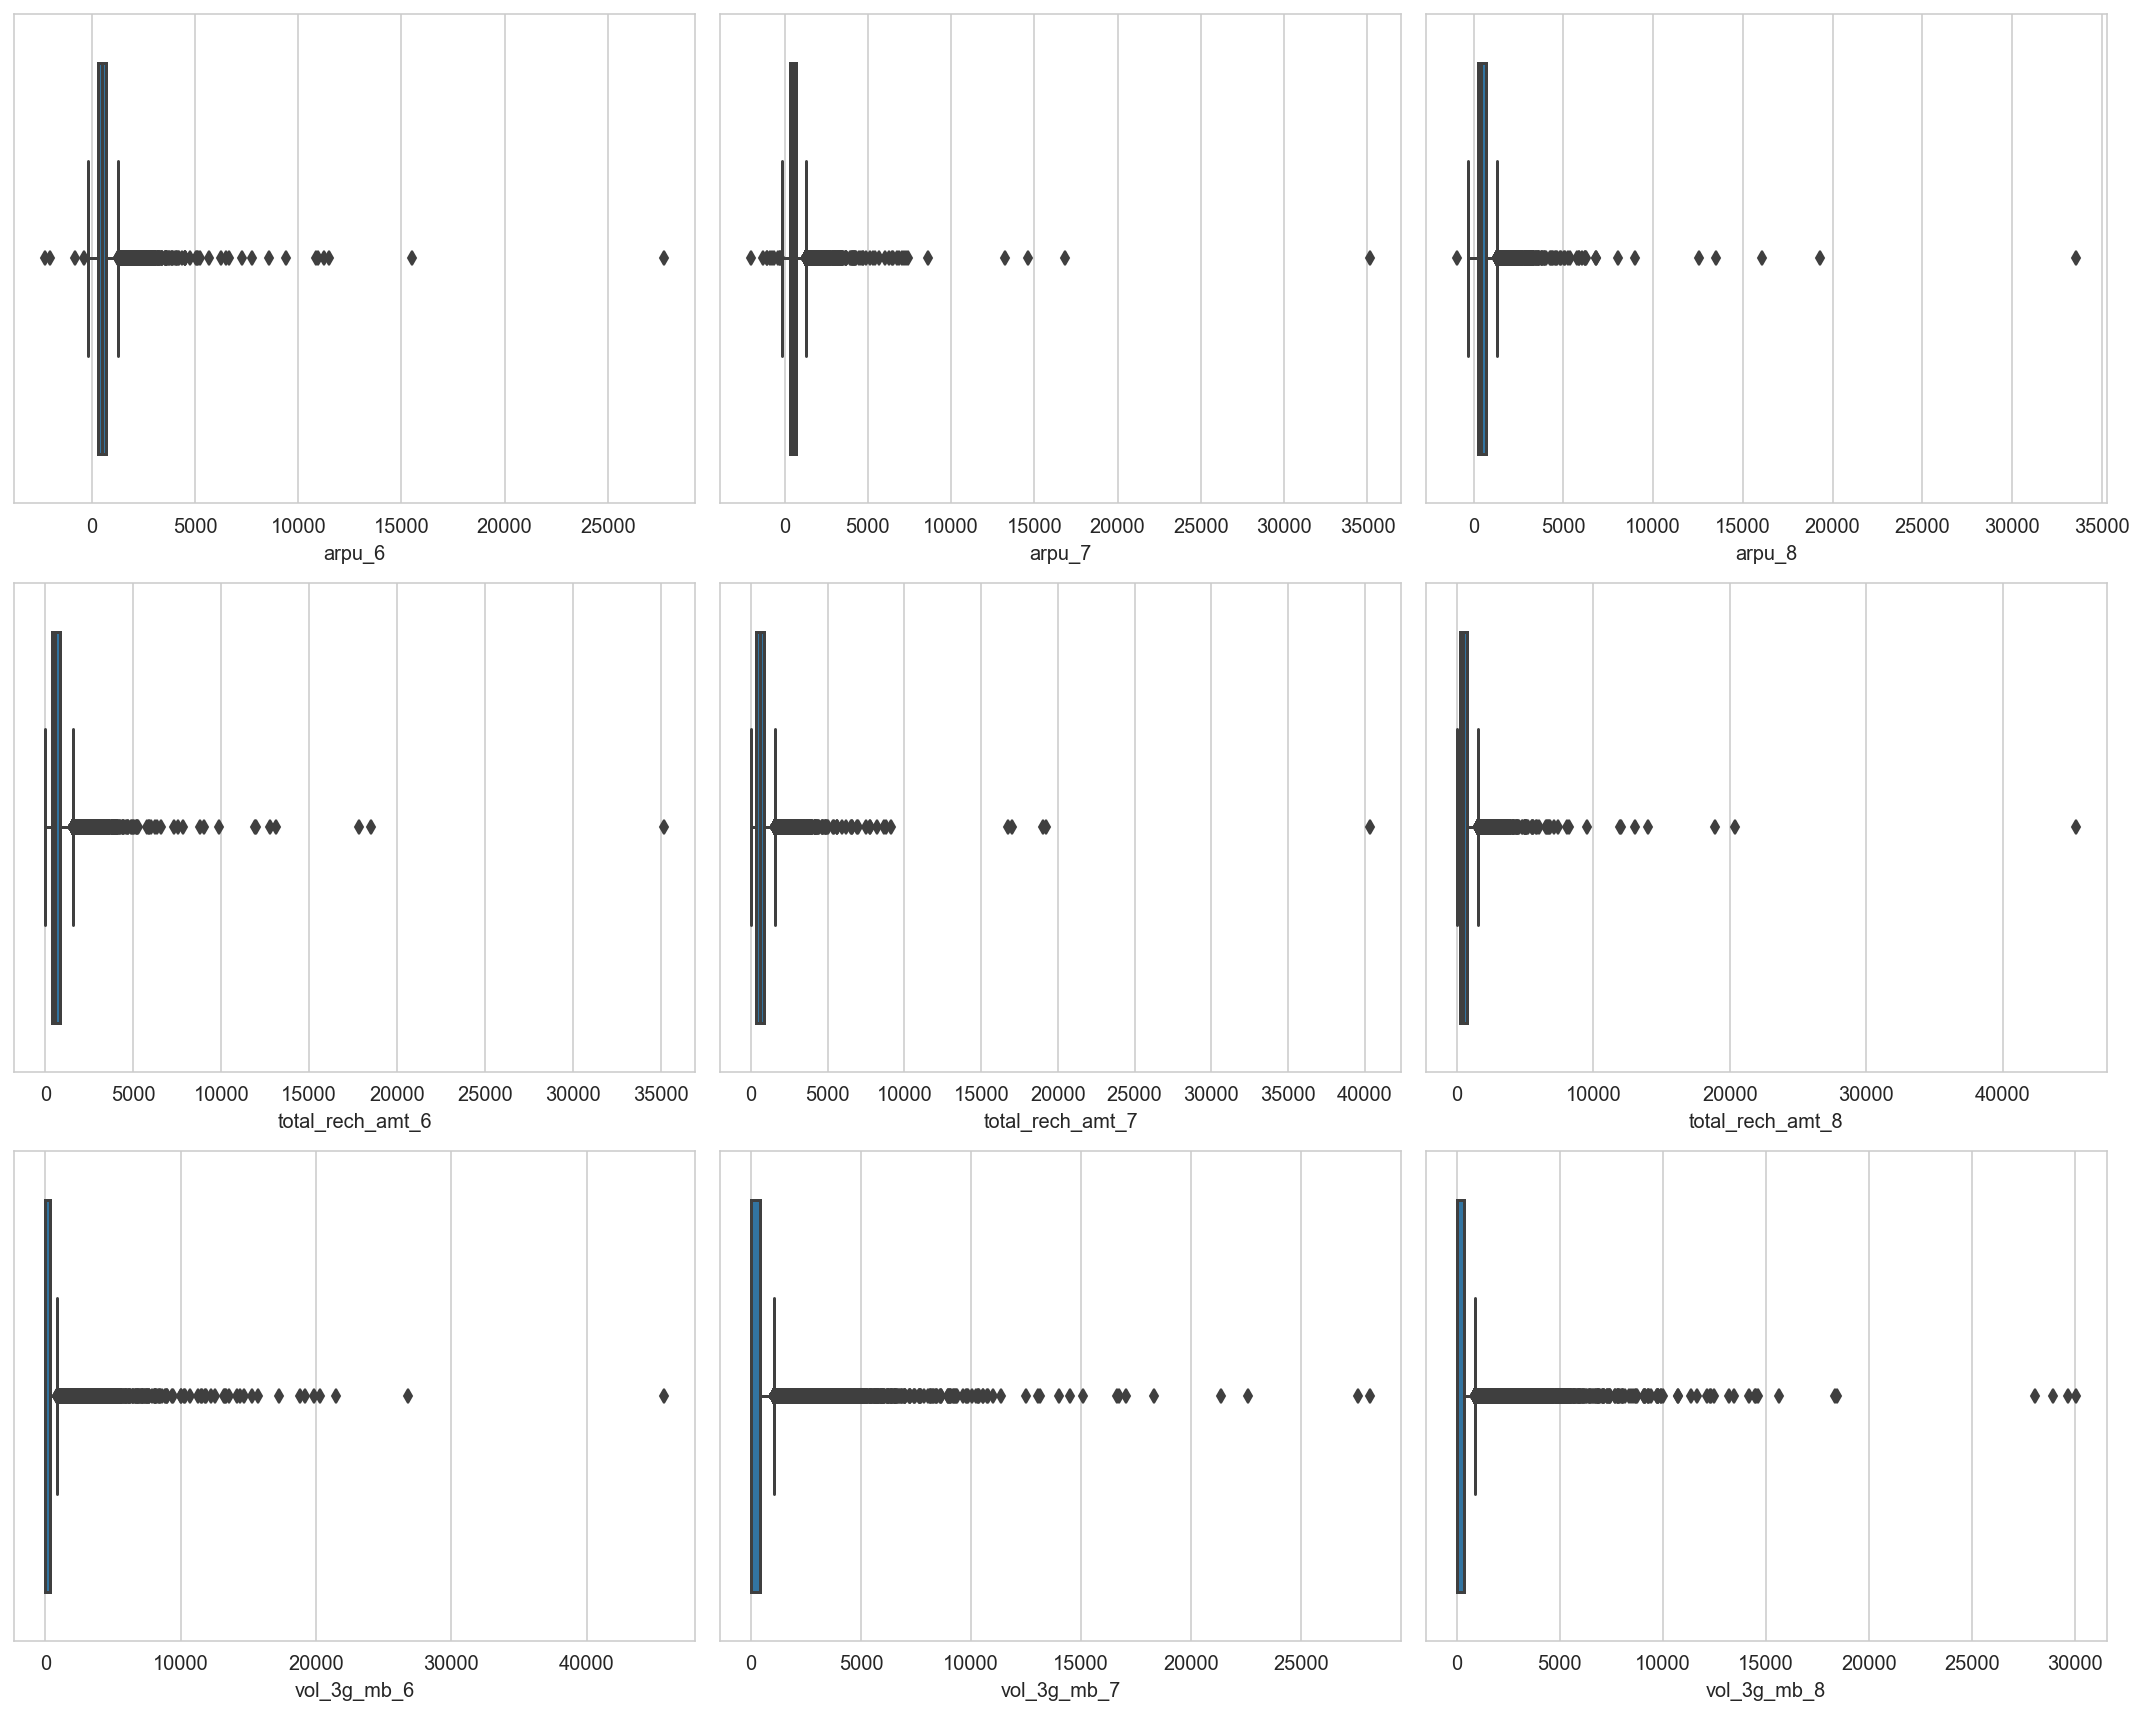

In [1727]:
# writing a function to plot a box plot

cols = ["arpu_6","arpu_7","arpu_8","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8"]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(telcom_removed[i[1]])
    
    
plt.tight_layout()
plt.show()

**from statastical summary and boxplots we observe that data is highly skewed, but we are expected to see such outliers.**

-  ### Subtask 6.2 : capping outliers using k-sigma 

In [1728]:
# lets cap the outliers within 3 standard deviations away from the mean.
# writing a function

def cap_outliers(data, k=3):
    upper_limit = data.mean() + k*data.std()
    lower_limit = data.mean() - k*data.std()
    data[data<lower_limit] = lower_limit
    data[data>upper_limit] = upper_limit
    return data

In [1729]:
# aplly cappig on only numerical variables
cat_col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8','churn']


telcom_removed.loc[:, ~telcom_removed.columns.isin(cat_col)]= telcom_removed.loc[:, ~telcom_removed.columns.isin(cat_col)].apply(cap_outliers, axis=0)

In [1730]:
# checking for stats
telcom_removed.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.190437,550.814573,498.441171,245.135899,251.814909,217.873084,360.381635,363.678175,322.981702,12.324453,9.182973,9.218402,20.590115,14.991576,14.900044,593.477978,611.006104,533.001799,277.926328,283.954653,268.064438,11.606818,11.470941,9.738043,648.062189,648.223689,572.185910,162.247357,164.681944,153.829721,95.253705,94.876863,87.397390,1.578785,1.764332,1.522783,75.323064,77.071625,69.849879,125.275839,133.671573,116.133092,113.086612,110.827412,92.308197,311.305862,334.677696,316.753516,60.039289,61.085971,55.751629,57.549434,58.081679,52.193211,-0.427919,-0.418953,-0.456885,0.162925,0.170937,0.143327,0.976537,1.127116,0.961168,0.196946,0.205904,0.189431,0.162736,0.174138,0.148882,0.075997,0.092597,0.008833,1209.265827,152.768184,161.311677,141.546609
std,356.617955,361.120770,384.493319,371.205484,387.229760,353.906251,403.772187,412.171856,383.823666,41.750280,35.649995,35.301200,66.900217,52.507665,53.593739,613.798254,633.909173,602.715259,296.692217,300.818719,295.703932,8.098621,8.234645,8.112399,430.636601,441.268660,463.024954,130.747590,134.287275,129.472802,103.752260,104.723447,105.408310,2.353920,2.602330,2.402273,98.306076,99.433675,96.883608,164.230463,171.083025,162.313141,242.554523,240.206372,216.560879,631.276715,653.840360,646.002538,132.354292,134.406318,126.999127,119.992037,121.644499,114.481801,0.521484,0.518111,0.520464,0.387603,0.400701,0.360264,2.073438,2.315567,2.066318,0.492166,0.515368,0.490119,0.537111,0.589553,0.557659,0.976332,0.973118,0.972260,957.361979,321.412159,339.112777,310.332338
min,-823.430558,-878.548639,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

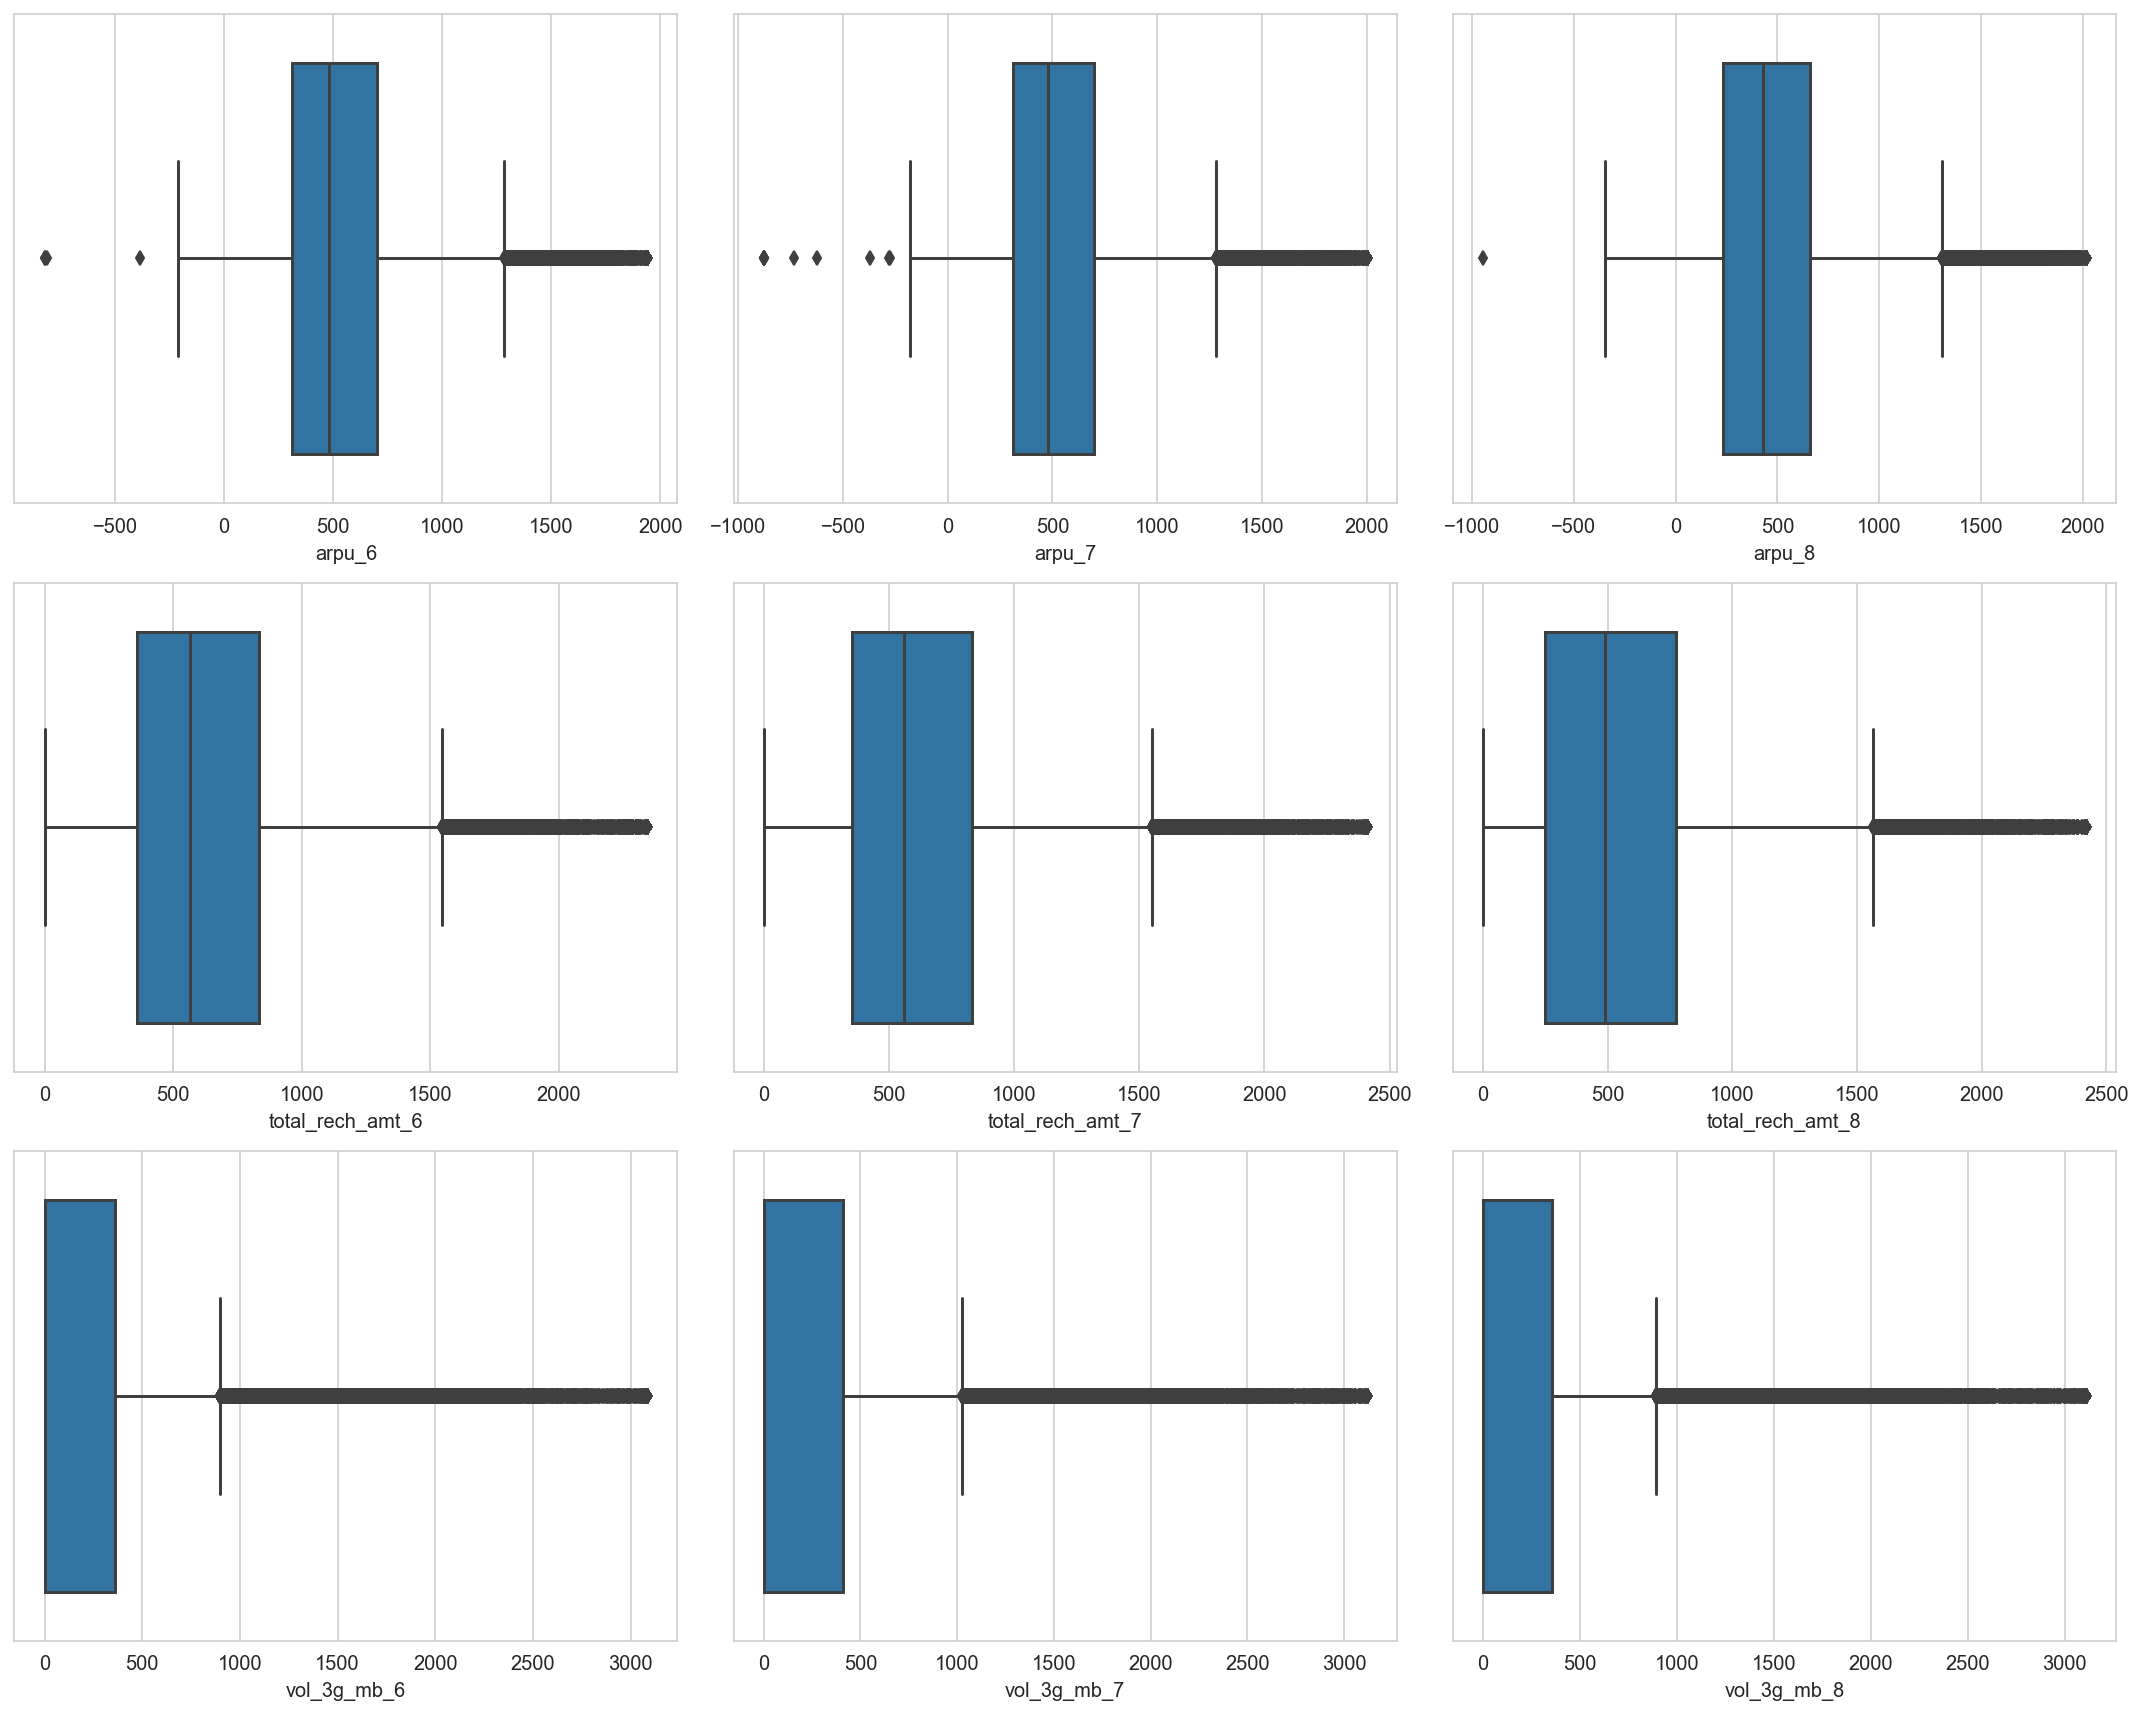

In [1731]:
# writing a function to plot a box plot

cols = ["arpu_6","arpu_7","arpu_8","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8"]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(telcom_removed[i[1]])
    
    
plt.tight_layout()
plt.show()

**after capping, there are still outliers but they are continious. and its better from previous case.**

In [1732]:
# capping derived variable data
telcom_derived.describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-0.427919,-0.418953,-0.456885,0.075997,0.092597,0.008833,1209.368754,-51.038557,-29.52829,-38.911683,-1.875878,-3.496201,-67.437337,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-8.231159,-6.467768,-28.752505,-19.896683,-5.733637,-5.041000,-5.675100,-0.025249,-0.085180,-0.012366,-0.016049,0.440497
std,0.521484,0.518111,0.520464,0.976332,0.973118,0.972260,957.677989,334.872321,308.19445,347.579120,65.972062,94.165541,502.630069,221.899902,6.755899,418.479122,136.893018,2.214561,145.251806,78.343307,1416.997573,256.114926,624.877555,130.961477,116.362092,0.353771,1.867673,0.474128,0.871149,316.100543
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,180.000000,-5811.052500,-5295.31500,-7094.390000,-1296.985000,-2410.835000,-7213.410000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-3065.000000,-1303.000000,-52407.500000,-4740.925000,-12385.505000,-2944.290000,-2980.040000,-3.000000,-26.000000,-7.500000,-21.500000,-4808.360000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,460.000000,-180.179500,-51.48500,-98.855000,0.000000,0.000000,-168.025000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-52.000000,-7.000000,-205.000000,-21.120000,-2.270000,-4.080000,-10.545000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,846.000000,-40.754500,-3.19000,-10.915000,0.000000,0.000000,-14.625000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1756.000000,83.239000,20.01500,44.360000,0.000000,0.000000,67.915000,44.280000,1.000000,99.500000,25.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4321.000000,12808.617000,6359.92000,12604.240000,2330.200000,3057.150000,12768.705000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,3949.000000,1352.000000,86866.500000,8062.295000,15646.390000,3716.900000,3027.375000,3.500000,26.500000,7.000000,36.000000,8254.620000


from statastical summary we can see that, there are some outliers present in the data.

In [1733]:
# creating a copy
telcom_outl = telcom_derived.copy()

In [1734]:
# apply cappig on only numerical variables
cat_col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8','churn']


telcom_outl.loc[:, ~telcom_outl.columns.isin(cat_col)]= telcom_outl.loc[:, ~telcom_outl.columns.isin(cat_col)].apply(cap_outliers, axis=0)

## Task 7 : EDA

In [1735]:
telcom_removed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803000,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.00000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1
7000701601,1069.180,1349.850,2014.483901,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74,5.0,5.0,7.0,1580.0,790.0,2418.103175,695.232696,716.373953,679.76786,0.0,0.0,527.940627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1
7001524846,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.00000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,21.03,910.65,122.16,0
7002124215,514.453,597.753,637.760000,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04,22.0,26.0,27.0,600.0,680.0,718.000000,50.000000,50.000000,50.00000,30.0,20.0,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,720.0,0.00,0.00,0.00,0
7000887461,74.350,193.897,366.966000,48.96,50.66,33.58,85.41,89.360,205.89,0.00,0.00,0.00,0.00,0.00,0.00,134.38,140.04,239.48,119.58,222.89,298.33,3.0,5.0,4.0,0.0,454.0,439.000000,0.000000,179.000000,179.00000,0.0,179.0,0.000000,0.0,2.0,2.0,0.0,179.0,179.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,604.0,40.45,51.86,0.00,0


<AxesSubplot:xlabel='churn', ylabel='aon'>

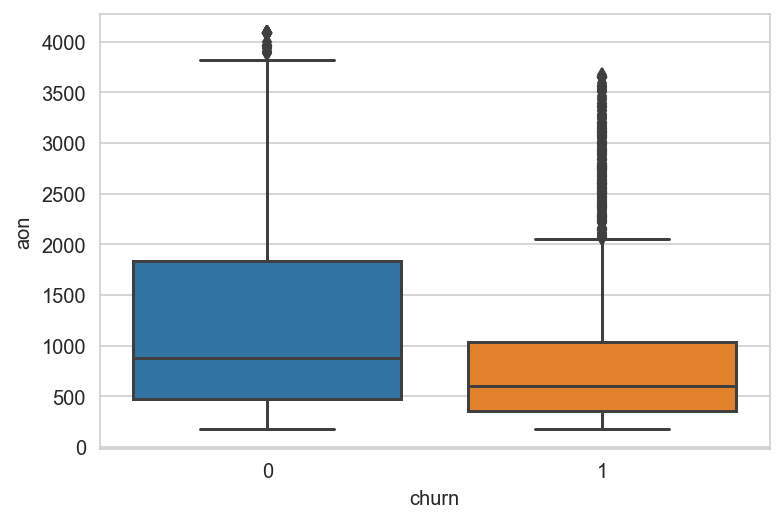

In [1736]:
# lets check forage on network and how it affects churn variable

sns.boxplot(y="aon",x="churn", data=telcom_removed)

**here we can clearly see that, user of higher age on network less likely to churn.**

In [1737]:
# lets check how arpu affects on churn

def box_plot(m_6,m_7,m_8):
    avg = pd.Series((telcom_removed[m_6] +  telcom_removed[m_7] +  telcom_removed[m_8])/3)
    
    sns.boxplot(x=telcom_removed["churn"] ,y=avg)
    
    return plt.show()


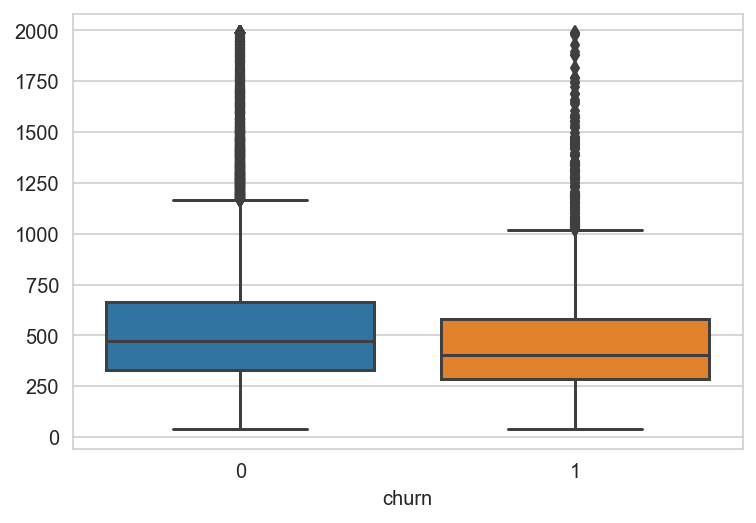

In [1738]:
# avg arpu affecting churn
box_plot("arpu_6","arpu_7","arpu_8")

**avg arpu of users who churned is slightly less than who did not churned**

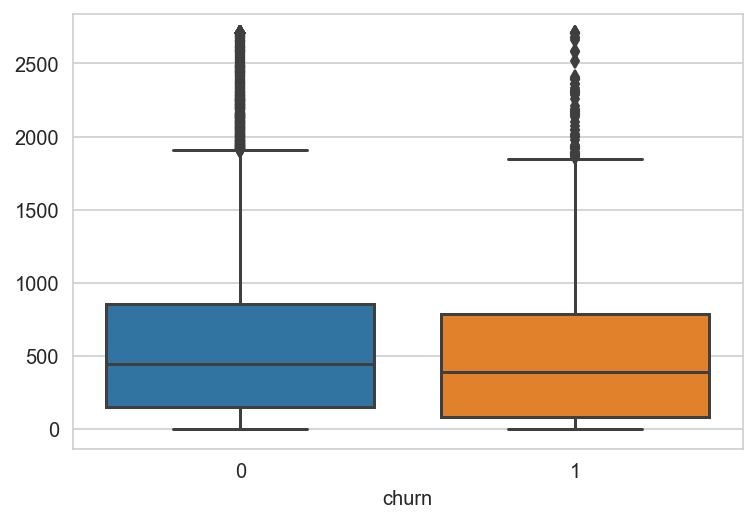

In [1739]:
# avg outgoing mou affecting churn
box_plot("total_og_mou_6","total_og_mou_7","total_og_mou_8")

median values for both churn and non churn users are very close. cant sepreate them out.

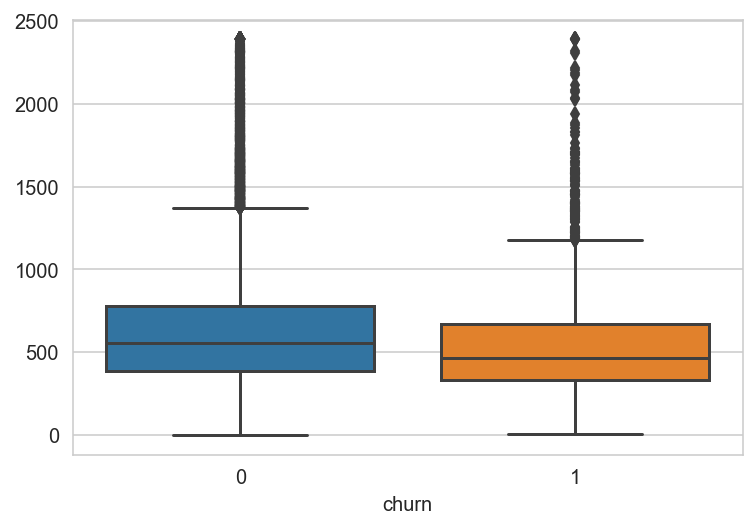

In [1740]:
# avg recharge amount affecting churn
box_plot("total_rech_amt_6","total_rech_amt_7","total_rech_amt_8")

avg recharge amount of users who churned is slightly less than who did not churned.

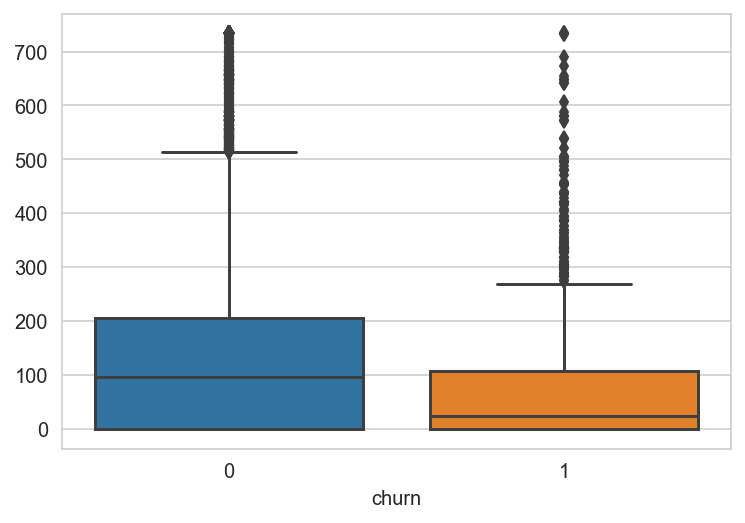

In [1741]:
# avg recharge amount affecting churn
box_plot("av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8")

**here we can observe that, user who on an average high on data, likely to stay.**

In [1742]:
telcom_outl.columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'aon', 'churn', 'arpu_change',
       'onnet_mou_change', 'offnet_mou_change', 'roam_ic_mou_change',
       'roam_og_mou_change', 'total_og_mou_change', 'total_ic_mou_change',
       'total_rech_num_change', 'total_rech_amt_change', 'max_rech_amt_change',
       'total_rech_data_change', 'last_day_rch_amt_change',
       'max_rech_data_change', 'total_data_rech_amt_change',
       'vol_2g_mb_change', 'vol_3g_mb_change', 'arpu_3g_change',
       'arpu_2g_change', 'monthly_2g_change', 'sachet_2g_change',
       'monthly_3g_change', 'sachet_3g_change', 'vbc_3g_change'],
      dtype='object')

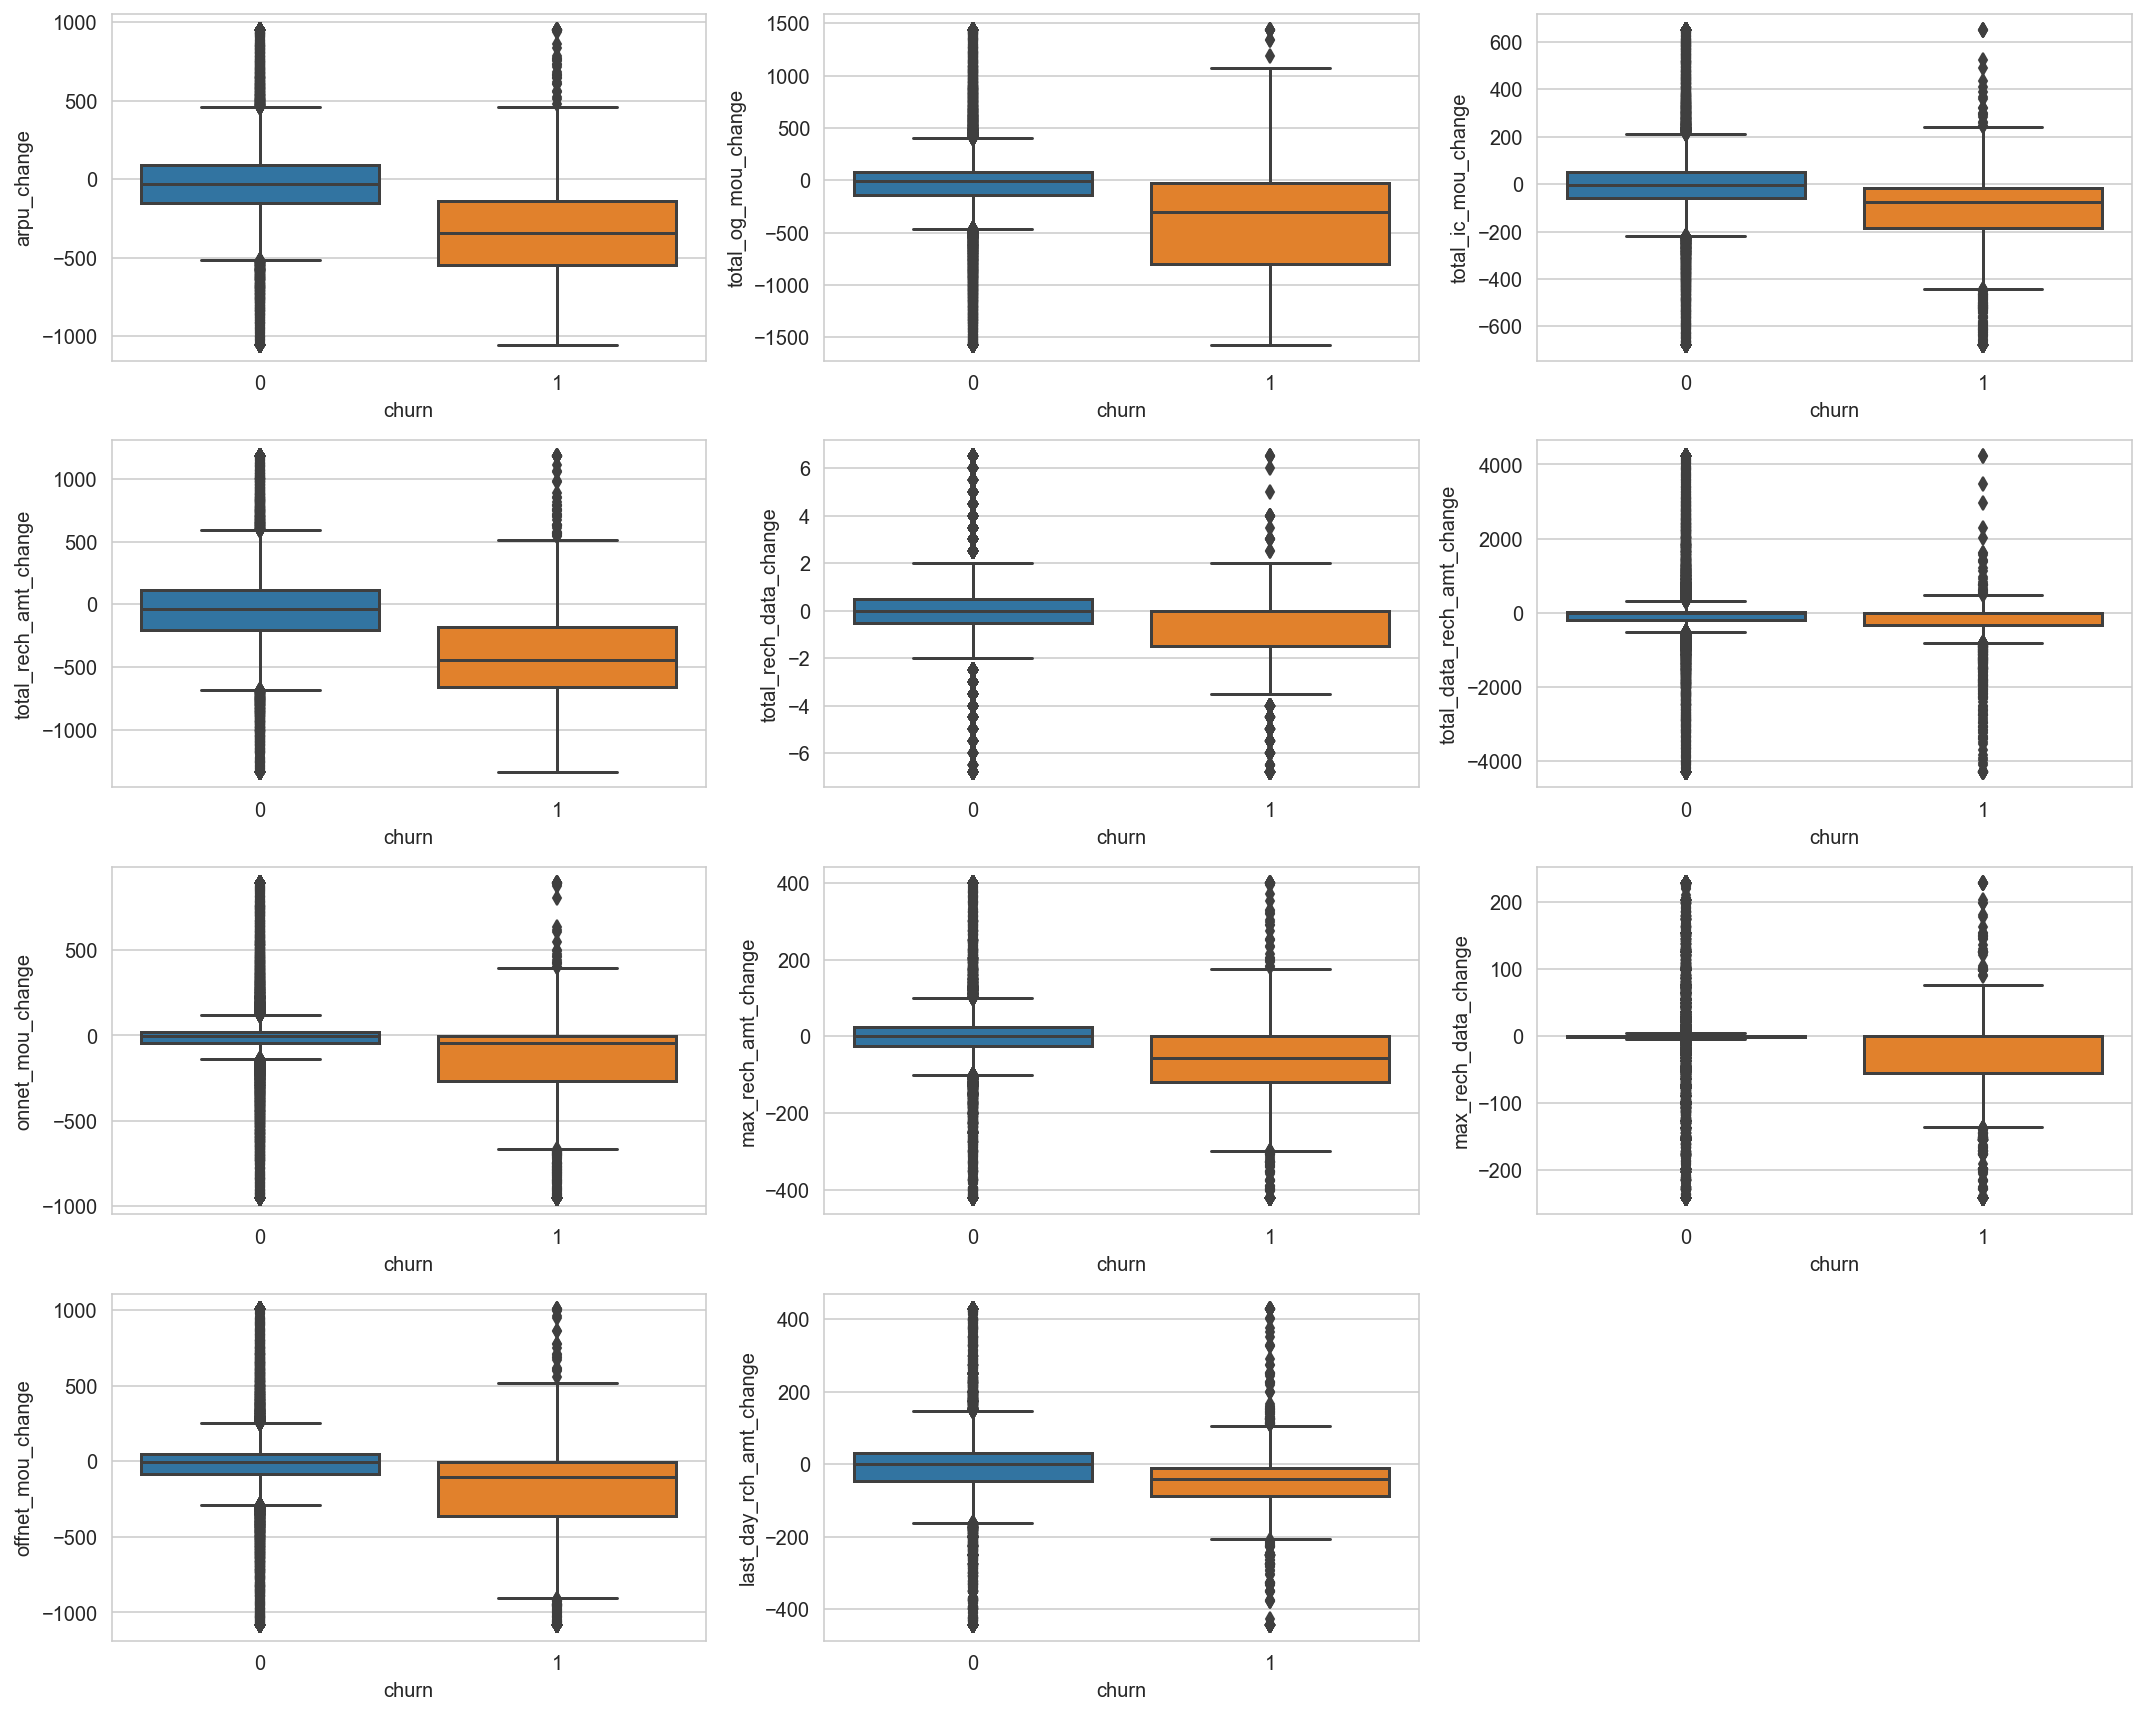

In [1743]:
# lets see how derived variable affects churn

# writing a function to plot a box plot

cols = ['arpu_change','total_og_mou_change','total_ic_mou_change',
       'total_rech_amt_change','total_rech_data_change','total_data_rech_amt_change',
        'onnet_mou_change','max_rech_amt_change','max_rech_data_change','offnet_mou_change',
        'last_day_rch_amt_change',]

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cols):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(y=telcom_outl[i[1]],x=telcom_outl["churn"])
    
    
plt.tight_layout()
plt.show()

- **we can clearly see that, change in user arpu behaviour reflects on the churn. not churned users arpu is near zero whereas churn user.**


- **total outgoing and incoming minute of usage also seperate churned user from non churned user.**


- **change in total recharge amount for non churned user is around zero, where as it is negative for churned customer.**


- **total recharge data amount there is very less behavioural change in user of churn and non churn.**


- **maximum recharge of talktime and data also helps to seperate out churn from non churn.**


- **onnett and offnet change seperate's churn user very narrowly.** 


- **last day recharge amount also seperates churn and non churn users.**

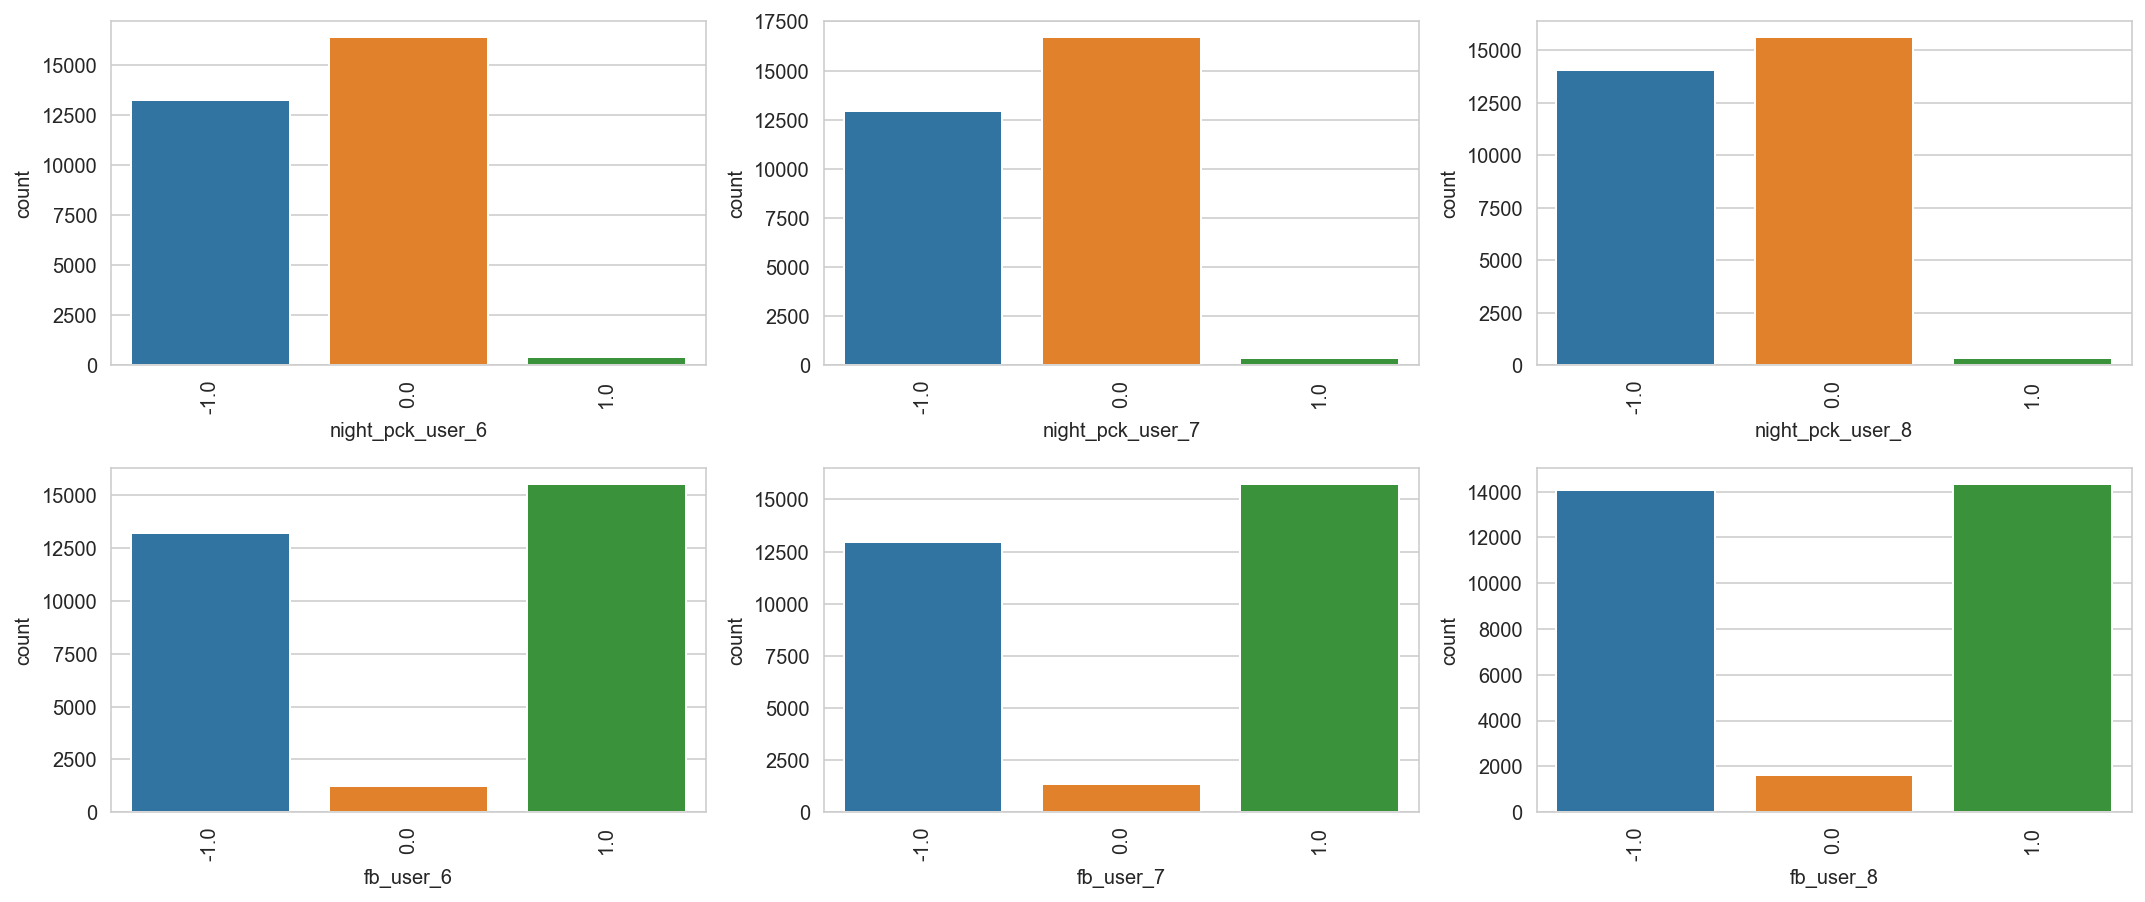

In [1744]:
cat_eda = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8']

plt.figure(figsize=(15,12))
sns.set_style("whitegrid")

for i in enumerate(cat_eda):
    plt.subplot(4,3,i[0]+1)
    sns.countplot(x=telcom_outl[i[1]])
    plt.xticks(rotation = 'vertical')
    
    
plt.tight_layout()
plt.show()

- **from above we can see that, very few users avails night pack services.**


- **large number of  users uses social media platform such as facebook.**

<AxesSubplot:>

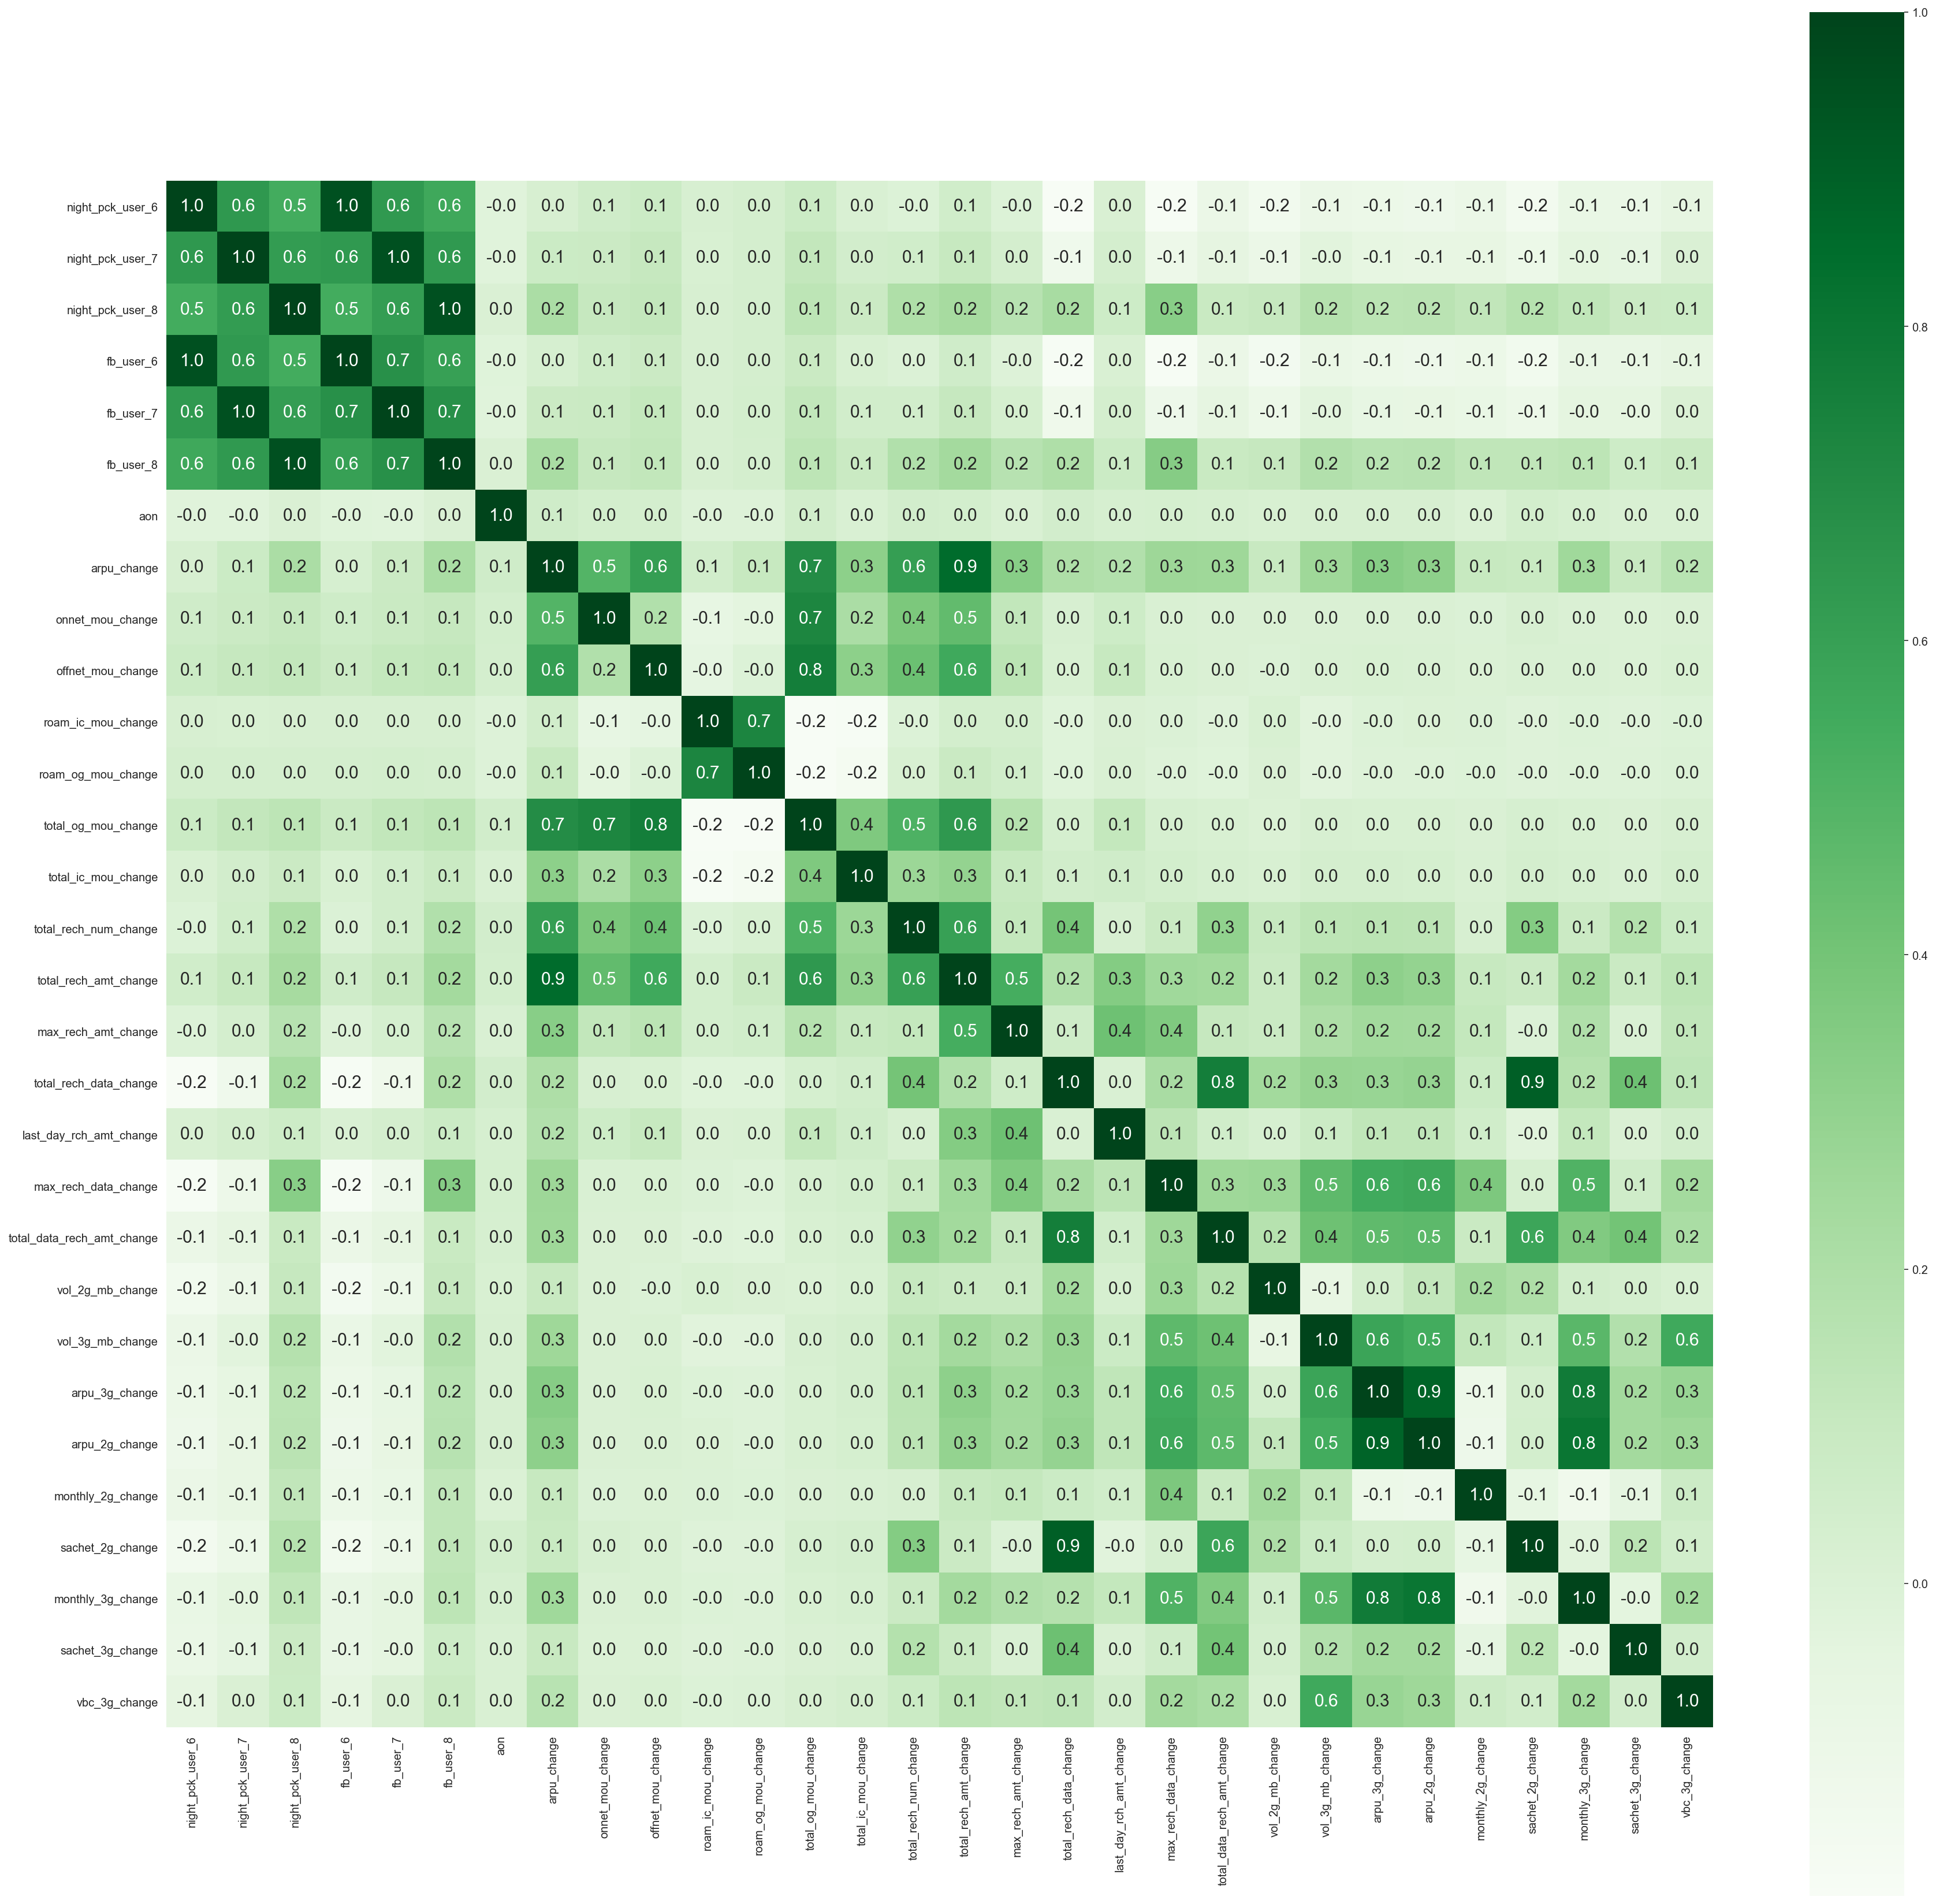

In [1745]:
# plotting a heatmap

corr_matrix = telcom_outl.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f',
            annot=True, annot_kws={'size':15}, cmap='Greens')


from above heatmap we can see that, there are some variables highly corelated with each other.

## Task 8 : creating dummy variable

In [1746]:
cols_categorical= ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8']

for i in cols_categorical:
    telcom_outl[i] = telcom_outl[i].astype('category')

In [1747]:
telcom_outl = pd.get_dummies(telcom_outl, columns=cols_categorical, drop_first=True)
print(telcom_outl.shape)
telcom_outl.head()

(30001, 37)


,aon,churn,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,968.0,1,7.702500,-33.32,-94.0225,0.00,0.000,0.000,5.440,-1.5,-55.000000,0.0,0.0,0.000000,0.0,0.0,-9.975,-7.555,0.000,0.00,0.0,0.0,0.0,0.0,-20.200,1,0,1,0,1,0,0,1,0,1,0,1
7000701601,802.0,1,953.578407,-3.97,-184.3850,6.78,19.895,-198.225,-163.510,2.0,1179.187642,395.0,0.0,427.524259,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,38.680,0,0,0,0,0,0,0,0,0,0,0,0
7001524846,315.0,0,-298.110000,-347.28,48.8350,0.00,0.000,-298.450,-49.635,-6.0,-399.000000,-92.0,2.0,-15.000000,-54.0,30.0,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-495.375,0,0,1,0,1,0,0,0,0,1,0,1
7002124215,720.0,0,81.657000,-32.12,156.0850,0.00,0.000,123.975,91.550,3.0,78.000000,0.0,0.0,25.000000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0
7000887461,604.0,0,232.842500,-16.23,118.5050,0.00,0.000,102.270,127.095,0.0,212.000000,89.5,1.0,-89.500000,89.5,184.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,14.520,0,0,1,0,1,0,0,0,0,1,0,1


In [1748]:
conv_cols = ["night_pck_user_6_0.0","night_pck_user_6_1.0","night_pck_user_7_0.0",
             "night_pck_user_7_1.0","night_pck_user_8_0.0","night_pck_user_8_1.0",
             "fb_user_6_0.0","fb_user_6_1.0","fb_user_7_0.0","fb_user_7_1.0",
             "fb_user_8_0.0","fb_user_8_1.0"]


for i in conv_cols:
    telcom_outl[i] = telcom_outl[i].astype('float')


## Task 9: Train-Test split

In [1749]:
# independent features
X = telcom_outl.drop("churn",axis=1)
print(X.shape)
X.head()

(30001, 36)


,aon,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,968.0,7.702500,-33.32,-94.0225,0.00,0.000,0.000,5.440,-1.5,-55.000000,0.0,0.0,0.000000,0.0,0.0,-9.975,-7.555,0.000,0.00,0.0,0.0,0.0,0.0,-20.200,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7000701601,802.0,953.578407,-3.97,-184.3850,6.78,19.895,-198.225,-163.510,2.0,1179.187642,395.0,0.0,427.524259,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,38.680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7001524846,315.0,-298.110000,-347.28,48.8350,0.00,0.000,-298.450,-49.635,-6.0,-399.000000,-92.0,2.0,-15.000000,-54.0,30.0,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-495.375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7002124215,720.0,81.657000,-32.12,156.0850,0.00,0.000,123.975,91.550,3.0,78.000000,0.0,0.0,25.000000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000887461,604.0,232.842500,-16.23,118.5050,0.00,0.000,102.270,127.095,0.0,212.000000,89.5,1.0,-89.500000,89.5,184.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,14.520,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [1750]:
# putting Target variable in y

y = telcom_outl["churn"].astype('int')
print(y.shape)
y.head()

(30001,)


mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int32

In [1751]:
# spliting data into trian and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 42, 
                                                    stratify = y)

In [1752]:
print(X_train.shape)
print(X_test.shape)

(24000, 36)
(6001, 36)


## Task 10: Feature Scaling & Data Balancing

### Scaling

In [1753]:
# using standardize scaling

scaler = StandardScaler() #creating standard scaler instanse

In [1754]:
scale_cols = ['aon', 'vbc_3g_change',
       'arpu_change', 'onnet_mou_change', 'offnet_mou_change',
       'roam_ic_mou_change', 'roam_og_mou_change', 'total_og_mou_change',
       'total_ic_mou_change', 'total_rech_num_change', 'total_rech_amt_change',
       'max_rech_amt_change', 'total_rech_data_change',
       'last_day_rch_amt_change', 'max_rech_data_change',
       'total_data_rech_amt_change', 'vol_2g_mb_change', 'vol_3g_mb_change',
       'arpu_3g_change', 'arpu_2g_change', 'monthly_2g_change',
       'sachet_2g_change', 'monthly_3g_change', 'sachet_3g_change']

In [1755]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [1756]:
# checking for changes
X_train.head()

,aon,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000710802,-0.903103,-0.133455,0.022314,0.204311,0.053876,0.067258,0.141902,0.908626,-0.721467,-0.802405,0.090006,-0.194795,-0.294272,0.091940,-0.409333,0.085984,-1.018673,-1.047148,-1.105535,0.072472,0.0534,-1.258611,0.053197,-0.993269,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7000830470,0.514600,0.536475,0.125294,-0.048612,0.053876,0.067258,0.038971,-0.103465,-0.039077,0.513533,0.257568,0.353342,0.022144,-0.444312,0.273881,-0.624919,1.486287,-0.827807,-0.947802,3.171231,0.0534,-1.258611,0.053197,1.957104,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7000476256,-0.596997,-0.904786,-0.291505,-0.496592,0.053876,0.067258,-0.470966,-0.146400,-1.659752,-0.687554,0.257568,0.079274,0.081758,0.091940,0.053904,0.109363,0.016354,0.053703,0.064615,0.072472,0.0534,0.037595,0.053197,0.005535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7001432312,1.858127,-0.915058,0.040359,-0.870046,0.053876,0.067258,-0.523055,-3.855169,-0.294973,-0.755357,0.090006,0.079274,-1.027990,0.091940,0.053904,0.056206,-0.116510,0.137940,0.500532,0.072472,0.0534,0.037595,0.053197,-0.319296,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7002255394,-0.436108,-0.173948,0.043484,-0.386536,0.053876,0.067258,-0.217604,-0.520318,0.046221,-0.077324,-0.008560,0.079274,0.265188,0.216821,0.033071,0.086010,0.016354,0.053703,-0.082695,0.072472,0.0534,0.037595,0.053197,0.005535,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### checking for data Imbalance

In [1757]:
# as we ahve seen before data is imbalanced
telcom_outl["churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

**data is highly imbalanced only 8% are from class 1.**

##### data balancing using undersampling technique

In [1758]:
under_sample = RandomUnderSampler(random_state = 42)
X_train_balanced, y_train_balanced = under_sample.fit_resample(X_train, y_train)

In [1759]:
print('Class Balance count : ',Counter(y_train_balanced))

Class Balance count :  Counter({0: 1953, 1: 1953})


# Interpretable Model

## Task 11: Logistic Regression

In [1760]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

In [1761]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

-  **Feature Selection Using RFE**

In [1762]:
# creating instance of LogisticRegression class
logreg = LogisticRegression(random_state=42)

In [1763]:
# running RFE with 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train_balanced, y_train_balanced)

In [1764]:
list(zip(X_train_balanced.columns, rfe.support_, rfe.ranking_))

[('aon', True, 1),
 ('arpu_change', False, 3),
 ('onnet_mou_change', False, 5),
 ('offnet_mou_change', False, 4),
 ('roam_ic_mou_change', False, 19),
 ('roam_og_mou_change', False, 14),
 ('total_og_mou_change', True, 1),
 ('total_ic_mou_change', True, 1),
 ('total_rech_num_change', True, 1),
 ('total_rech_amt_change', False, 11),
 ('max_rech_amt_change', True, 1),
 ('total_rech_data_change', True, 1),
 ('last_day_rch_amt_change', True, 1),
 ('max_rech_data_change', False, 22),
 ('total_data_rech_amt_change', False, 6),
 ('vol_2g_mb_change', True, 1),
 ('vol_3g_mb_change', False, 7),
 ('arpu_3g_change', False, 8),
 ('arpu_2g_change', True, 1),
 ('monthly_2g_change', False, 10),
 ('sachet_2g_change', False, 9),
 ('monthly_3g_change', False, 21),
 ('sachet_3g_change', False, 17),
 ('vbc_3g_change', True, 1),
 ('night_pck_user_6_0.0', False, 18),
 ('night_pck_user_6_1.0', False, 12),
 ('night_pck_user_7_0.0', False, 20),
 ('night_pck_user_7_1.0', True, 1),
 ('night_pck_user_8_0.0', True, 1

In [1765]:
col = X_train_balanced.columns[rfe.support_] # rfe selected features
col

Index(['aon', 'total_og_mou_change', 'total_ic_mou_change',
       'total_rech_num_change', 'max_rech_amt_change',
       'total_rech_data_change', 'last_day_rch_amt_change', 'vol_2g_mb_change',
       'arpu_2g_change', 'vbc_3g_change', 'night_pck_user_7_1.0',
       'night_pck_user_8_0.0', 'fb_user_7_0.0', 'fb_user_7_1.0',
       'fb_user_8_1.0'],
      dtype='object')

**Model 1**

In [1766]:
# creating x_train using RFE selected columns
X_train_rfe = X_train_balanced[col]
X_train_rfe.head()

,aon,total_og_mou_change,total_ic_mou_change,total_rech_num_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,vol_2g_mb_change,arpu_2g_change,vbc_3g_change,night_pck_user_7_1.0,night_pck_user_8_0.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_1.0
0,-0.523865,0.268271,0.068243,-0.039077,-2.595911,-0.468864,-3.990254,-0.629744,0.064615,-0.086887,0.0,1.0,0.0,1.0,1.0
1,-0.080898,0.602363,1.940927,-0.124376,0.090006,-0.194795,-0.844561,-1.165740,-1.236244,2.586157,0.0,1.0,0.0,1.0,1.0
2,-0.734901,-2.295550,-0.392701,-3.195127,0.090006,0.079274,-0.147529,0.109363,0.064615,0.005535,0.0,0.0,0.0,0.0,0.0
3,0.088348,0.335617,0.593168,0.813909,-0.767516,-0.194795,0.081758,0.109363,0.064615,0.005535,0.0,0.0,1.0,0.0,0.0
4,2.549740,3.174707,0.854966,1.666895,0.947529,0.627411,0.173473,1.915424,2.569597,-0.025853,0.0,1.0,0.0,0.0,1.0


In [1767]:
# adding constant values to new X train containg RFE variables
X_train_rfe_con = sm.add_constant(X_train_rfe) 

lrm_1 = sm.GLM(y_train_balanced, X_train_rfe_con, family=sm.families.Binomial())

#fitting the model 
res = lrm_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3906
Model:                            GLM   Df Residuals:                     3890
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.6
Date:                Mon, 12 Oct 2020   Deviance:                       3755.2
Time:                        22:22:36   Pearson chi2:                 4.36e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2726      0.062     -4.379      0.000      -0.395      -0.151
aon                        -0.4314      0.046     -9.282      0.000      -0.522      -0.340
total_og_mou_change        -0.3845      0.048     -8.040      0.000      -0.478      -0.291
total_ic_mou_change        -0.4410      0.050     -8.741      0.000      -0.540      -0.342
total_rech_num_change      -0.2455      0.050     -4.957      0.000      -0.343      -0.148
max_rech_amt_change        -0.2059      0.041     -4.981      0.000      -0.287      -0.125
total_rech_data_change     -0.2882      0.054     -5.330      0.000      -0.394      -0.182
last_day_rch_amt_change    -0.2509      0.048     -5.258      0.000      -0.344      -0.157
vol_2g_mb_change           -0.1883      0.049     -3.867      0.000      -0.284      -0.093
arpu_2g_change             -0.2041      0.051     -3.988      0.000      -0.304      -0.104
vbc_3g_change              -0.1689      0.051     -3.286      0.001      -0.270      -0.068
night_pck_user_7_1.0       -0.5282      0.443     -1.193      0.233      -1.396       0.339
night_pck_user_8_0.0       -0.1332      0.186     -0.716      0.474      -0.498       0.232
fb_user_7_0.0              -0.4990      0.214     -2.332      0.020      -0.919      -0.080
fb_user_7_1.0              -0.1705      0.128     -1.333      0.183      -0.421       0.080
fb_user_8_1.0              -0.9169      0.208     -4.402      0.000      -1.325      -0.509
===========================================================================================
"""

In [1768]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,fb_user_8_1.0,8.83
11,night_pck_user_8_0.0,7.79
13,fb_user_7_1.0,3.60
3,total_rech_num_change,2.13
1,total_og_mou_change,2.01
5,total_rech_data_change,1.70
4,max_rech_amt_change,1.46
2,total_ic_mou_change,1.38
6,last_day_rch_amt_change,1.33
8,arpu_2g_change,1.33


**night_pck_user_8_0.0 have high p value and high VIF. lets remove it.**

In [1769]:
# droping Tags_Will revert after reading the email for high vif
X_train_rfe = X_train_rfe.drop(["night_pck_user_8_0.0"],1)

**Model 2**

In [1770]:
# adding constant values to new X train containg RFE variables
X_train_rfe_con = sm.add_constant(X_train_rfe) 

lrm_2 = sm.GLM(y_train_balanced, X_train_rfe_con, family=sm.families.Binomial())

#fitting the model 
res = lrm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3906
Model:                            GLM   Df Residuals:                     3891
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1877.8
Date:                Mon, 12 Oct 2020   Deviance:                       3755.7
Time:                        22:22:37   Pearson chi2:                 4.37e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2805      0.061     -4.578      0.000      -0.401      -0.160
aon                        -0.4322      0.046     -9.304      0.000      -0.523      -0.341
total_og_mou_change        -0.3829      0.048     -8.019      0.000      -0.476      -0.289
total_ic_mou_change        -0.4399      0.050     -8.727      0.000      -0.539      -0.341
total_rech_num_change      -0.2466      0.049     -4.983      0.000      -0.344      -0.150
max_rech_amt_change        -0.2083      0.041     -5.052      0.000      -0.289      -0.127
total_rech_data_change     -0.2952      0.053     -5.540      0.000      -0.400      -0.191
last_day_rch_amt_change    -0.2501      0.048     -5.240      0.000      -0.344      -0.157
vol_2g_mb_change           -0.1874      0.049     -3.847      0.000      -0.283      -0.092
arpu_2g_change             -0.2053      0.051     -4.009      0.000      -0.306      -0.105
vbc_3g_change              -0.1681      0.051     -3.270      0.001      -0.269      -0.067
night_pck_user_7_1.0       -0.4727      0.439     -1.076      0.282      -1.334       0.388
fb_user_7_0.0              -0.5469      0.203     -2.694      0.007      -0.945      -0.149
fb_user_7_1.0              -0.1779      0.128     -1.395      0.163      -0.428       0.072
fb_user_8_1.0              -1.0355      0.126     -8.194      0.000      -1.283      -0.788
===========================================================================================
"""

In [1771]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,fb_user_7_1.0,3.54
13,fb_user_8_1.0,3.14
3,total_rech_num_change,2.13
1,total_og_mou_change,2.00
5,total_rech_data_change,1.66
4,max_rech_amt_change,1.46
2,total_ic_mou_change,1.38
8,arpu_2g_change,1.33
6,last_day_rch_amt_change,1.32
7,vol_2g_mb_change,1.22


**night_pck_user_7_1.0 having high p value. lets remove it.**

In [1772]:
# droping Tags_Will revert after reading the email for high vif
X_train_rfe = X_train_rfe.drop(["night_pck_user_7_1.0"],1)

**Model 3**

In [1773]:
# adding constant values to new X train containg RFE variables
X_train_rfe_con = sm.add_constant(X_train_rfe) 

lrm_2 = sm.GLM(y_train_balanced, X_train_rfe_con, family=sm.families.Binomial())

#fitting the model 
res = lrm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3906
Model:                            GLM   Df Residuals:                     3892
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1878.4
Date:                Mon, 12 Oct 2020   Deviance:                       3756.9
Time:                        22:22:37   Pearson chi2:                 4.37e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2792      0.061     -4.560      0.000      -0.399      -0.159
aon                        -0.4315      0.046     -9.291      0.000      -0.523      -0.341
total_og_mou_change        -0.3822      0.048     -8.006      0.000      -0.476      -0.289
total_ic_mou_change        -0.4411      0.050     -8.744      0.000      -0.540      -0.342
total_rech_num_change      -0.2446      0.049     -4.950      0.000      -0.341      -0.148
max_rech_amt_change        -0.2089      0.041     -5.067      0.000      -0.290      -0.128
total_rech_data_change     -0.2934      0.053     -5.516      0.000      -0.398      -0.189
last_day_rch_amt_change    -0.2510      0.048     -5.256      0.000      -0.345      -0.157
vol_2g_mb_change           -0.1886      0.049     -3.870      0.000      -0.284      -0.093
arpu_2g_change             -0.2042      0.051     -3.991      0.000      -0.304      -0.104
vbc_3g_change              -0.1652      0.051     -3.224      0.001      -0.266      -0.065
fb_user_7_0.0              -0.5514      0.203     -2.716      0.007      -0.949      -0.154
fb_user_7_1.0              -0.1831      0.127     -1.436      0.151      -0.433       0.067
fb_user_8_1.0              -1.0423      0.126     -8.255      0.000      -1.290      -0.795
===========================================================================================
"""

In [1774]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,fb_user_7_1.0,3.53
12,fb_user_8_1.0,3.14
3,total_rech_num_change,2.13
1,total_og_mou_change,2.00
5,total_rech_data_change,1.66
4,max_rech_amt_change,1.46
2,total_ic_mou_change,1.38
8,arpu_2g_change,1.33
6,last_day_rch_amt_change,1.32
7,vol_2g_mb_change,1.22


**fb_user_7_1.0 hve high p value, lets remove it.**

In [1775]:
# droping Tags_Will revert after reading the email for high vif
X_train_rfe = X_train_rfe.drop(["fb_user_7_1.0"],1)

**Model 4**

In [1776]:
# adding constant values to new X train containg RFE variables
X_train_rfe_con = sm.add_constant(X_train_rfe) 

lrm_2 = sm.GLM(y_train_balanced, X_train_rfe_con, family=sm.families.Binomial())

#fitting the model 
res = lrm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3906
Model:                            GLM   Df Residuals:                     3893
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1879.5
Date:                Mon, 12 Oct 2020   Deviance:                       3758.9
Time:                        22:22:38   Pearson chi2:                 4.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3085      0.058     -5.333      0.000      -0.422      -0.195
aon                        -0.4308      0.046     -9.273      0.000      -0.522      -0.340
total_og_mou_change        -0.3870      0.048     -8.122      0.000      -0.480      -0.294
total_ic_mou_change        -0.4387      0.050     -8.713      0.000      -0.537      -0.340
total_rech_num_change      -0.2469      0.049     -4.999      0.000      -0.344      -0.150
max_rech_amt_change        -0.2065      0.041     -5.014      0.000      -0.287      -0.126
total_rech_data_change     -0.2691      0.050     -5.358      0.000      -0.368      -0.171
last_day_rch_amt_change    -0.2494      0.048     -5.231      0.000      -0.343      -0.156
vol_2g_mb_change           -0.1737      0.048     -3.657      0.000      -0.267      -0.081
arpu_2g_change             -0.1879      0.050     -3.774      0.000      -0.285      -0.090
vbc_3g_change              -0.1644      0.051     -3.213      0.001      -0.265      -0.064
fb_user_7_0.0              -0.5107      0.201     -2.540      0.011      -0.905      -0.117
fb_user_8_1.0              -1.1656      0.093    -12.516      0.000      -1.348      -0.983
===========================================================================================
"""

In [1777]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_rech_num_change,2.13
1,total_og_mou_change,2.00
5,total_rech_data_change,1.51
4,max_rech_amt_change,1.44
2,total_ic_mou_change,1.38
6,last_day_rch_amt_change,1.32
8,arpu_2g_change,1.27
7,vol_2g_mb_change,1.17
9,vbc_3g_change,1.15
0,aon,1.06


**All variables are significant, as there p value is less than 0.05 and all VIF are below 3. we can consider model 5 as a final model.**

In [1778]:
# getting the predicted values on the train set
y_train_pred = res.predict(X_train_rfe_con)
y_train_pred[:5]

0    0.597887
1    0.096307
2    0.860863
3    0.215893
4    0.002998
dtype: float64

In [1779]:
# reshaping in appropriate form

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.59788657, 0.09630718, 0.86086305, 0.2158929 , 0.00299832])

In [1780]:
# creating Dataframe with actual values for converted and predicted probablities
y_train_pred_final = pd.DataFrame({"churn":y_train_balanced.values, "churn_prob":y_train_pred})
y_train_pred_final["USER_ID"] = y_train_balanced.index
y_train_pred_final.head()

,churn,churn_prob,USER_ID
0,0,0.597887,0
1,0,0.096307,1
2,0,0.860863,2
3,0,0.215893,3
4,0,0.002998,4


In [1781]:
# creating predicted column in which we will convert probablity score
# into 0 or 1 based on 0.5 threshold value

y_train_pred_final["Predicted"] = y_train_pred_final["churn_prob"].map(lambda x :1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,churn_prob,USER_ID,Predicted
0,0,0.597887,0,1
1,0,0.096307,1,0
2,0,0.860863,2,1
3,0,0.215893,3,0
4,0,0.002998,4,0


In [1782]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted)
print(confusion)

[[1533  420]
 [ 420 1533]]


In [1783]:
# checking for different metrics scores
evaluate_model(y_train_pred_final.churn, y_train_pred_final.Predicted)

Accuracy Score :  78.49
ROC AUC score :  78.49
Precision score :  78.49
Recall score :  78.49


In [1784]:
# lets check for ROC Curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, 
                                         y_train_pred_final.churn_prob, drop_intermediate = False)

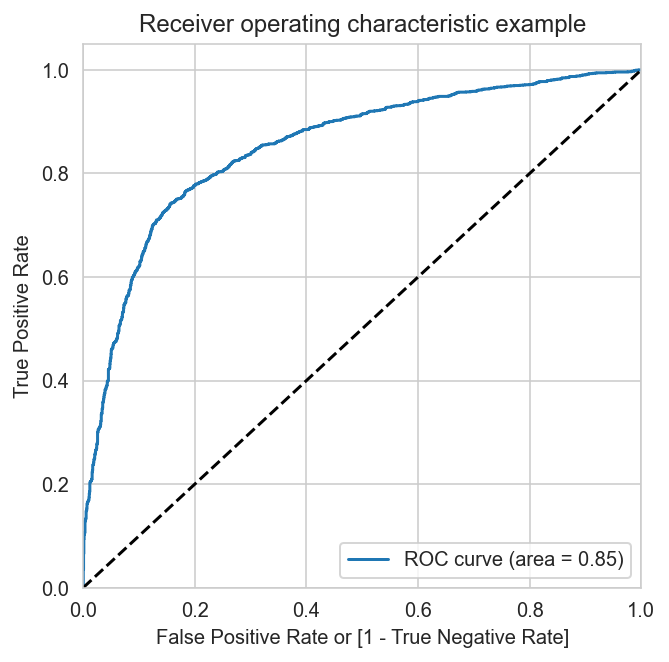

In [1785]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

- **Area under the curve is 85% which is good, it means model which we selected have good predictive power.**

**Finding omptimal cut-off**

In [1786]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,USER_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.597887,0,1,1,1,1,1,1,1,0,0,0,0
1,0,0.096307,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.860863,2,1,1,1,1,1,1,1,1,1,1,0
3,0,0.215893,3,0,1,1,1,0,0,0,0,0,0,0
4,0,0.002998,4,0,1,0,0,0,0,0,0,0,0,0


In [1787]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.591398  0.970814  0.211982
0.2   0.2  0.675371  0.934972  0.415771
0.3   0.3  0.732463  0.894009  0.570917
0.4   0.4  0.768561  0.845366  0.691756
0.5   0.5  0.784946  0.784946  0.784946
0.6   0.6  0.790067  0.721454  0.858679
0.7   0.7  0.758577  0.610343  0.906810
0.8   0.8  0.692012  0.431644  0.952381
0.9   0.9  0.586790  0.185356  0.988223


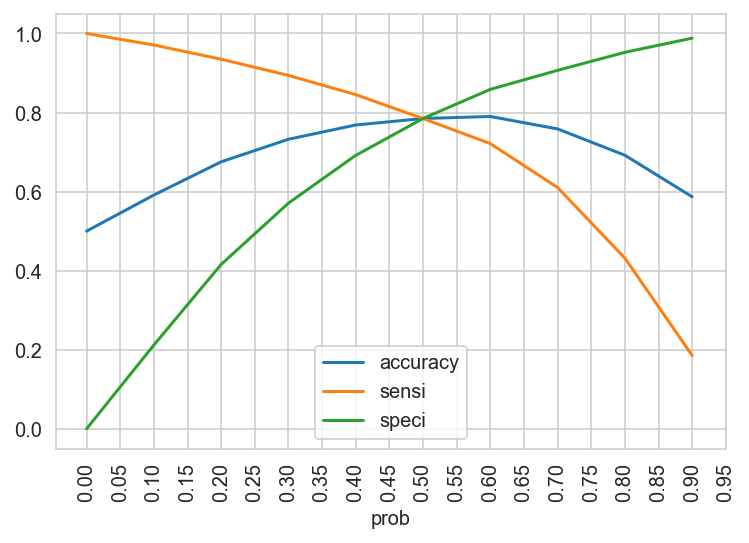

In [1788]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

**from above graph 0.5 looks optimal threshold**

In [1789]:
# recalculating by using 0.52 as a threshold
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,churn_prob,USER_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.597887,0,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.096307,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.860863,2,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.215893,3,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.002998,4,0,1,0,0,0,0,0,0,0,0,0,0


In [1790]:
evaluate_model(y_train_pred_final.churn, y_train_pred_final.Predicted)

Accuracy Score :  78.49
ROC AUC score :  78.49
Precision score :  78.49
Recall score :  78.49


##### predection of test data

In [1791]:
X_test_log = X_test.copy()

In [1792]:
# transforming test side
X_test_log[scale_cols] = scaler.transform(X_test_log[scale_cols])

In [1793]:
# selecting RFE columns
X_test_log = X_test_log[X_train_rfe.columns]
X_test.head()

,aon,arpu_change,onnet_mou_change,offnet_mou_change,roam_ic_mou_change,roam_og_mou_change,total_og_mou_change,total_ic_mou_change,total_rech_num_change,total_rech_amt_change,max_rech_amt_change,total_rech_data_change,last_day_rch_amt_change,max_rech_data_change,total_data_rech_amt_change,vol_2g_mb_change,vol_3g_mb_change,arpu_3g_change,arpu_2g_change,monthly_2g_change,sachet_2g_change,monthly_3g_change,sachet_3g_change,vbc_3g_change,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000853065,1929.0,32.8215,-1.430,-43.745,0.00,0.00,-46.080,-85.645,-5.0,1.5,37.5,0.5,-25.0,40.0,409.5,193.225,0.0000,-38.840,-37.205,0.0,1.0,0.0,-0.5,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7000440174,277.0,19.4615,-1.860,30.005,0.00,0.00,29.780,56.305,-1.5,5.0,74.0,-1.0,200.0,-225.0,-225.0,-57.995,-1880.3663,-106.255,-106.085,-0.5,0.0,-0.5,0.0,-947.861131,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7001137189,2352.0,-1.9700,9.495,15.080,0.00,0.00,24.580,19.145,-0.5,37.5,2.5,-4.5,6.5,4.0,-544.5,-375.600,0.0000,0.000,22.015,0.0,-4.5,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7002238039,578.0,-273.5045,36.590,-206.990,-21.34,-146.84,-23.555,-30.640,-5.5,-234.5,20.0,0.0,-84.0,0.0,0.0,0.000,0.0000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7002302503,919.0,-47.7385,2.535,17.720,0.00,0.00,20.265,32.555,-3.5,-39.0,-2.5,-2.0,-5.0,0.0,-964.0,11.705,6.0250,-47.065,-19.420,0.0,0.0,0.0,-2.0,167.845000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [1794]:
X_test_sm = sm.add_constant(X_test_log) # adding constant

y_test_pred = res.predict(X_test_sm) # presdecting using Trained model

y_test_pred[:10] #1st 10 probablities

mobile_number
7000853065    0.144173
7000440174    0.557134
7001137189    0.205829
7002238039    0.549790
7002302503    0.208665
7000783925    0.712509
7000911473    0.269013
7000186701    0.695604
7001823681    0.799475
7000869518    0.837654
dtype: float64

In [1795]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
mobile_number,
7000853065,0.144173
7000440174,0.557134
7001137189,0.205829
7002238039,0.549790
7002302503,0.208665


In [1796]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['USER_ID'] = y_test_df.index

In [1797]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1798]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,churn,USER_ID,0
0,0,7000853065,0.144173
1,0,7000440174,0.557134
2,0,7001137189,0.205829
3,1,7002238039,0.549790
4,0,7002302503,0.208665


In [1799]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})

In [1800]:
# applying cut off
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,churn,USER_ID,churn_Prob,final_predicted
0,0,7000853065,0.144173,0
1,0,7000440174,0.557134,1
2,0,7001137189,0.205829,0
3,1,7002238039,0.549790,1
4,0,7002302503,0.208665,0


In [1801]:
# evaluating model
evaluate_model(y_pred_final.churn, y_pred_final.final_predicted)

Accuracy Score :  77.82
ROC AUC score :  77.84
Precision score :  23.71
Recall score :  77.87


# Model Interpretation

In [1802]:
Result = pd.DataFrame(res.params,columns=["coefficient"])
Result.sort_values(by="coefficient", ascending=True)

,coefficient
fb_user_8_1.0,-1.165635
fb_user_7_0.0,-0.510669
total_ic_mou_change,-0.438693
aon,-0.430757
total_og_mou_change,-0.386963
const,-0.308457
total_rech_data_change,-0.269102
last_day_rch_amt_change,-0.249443
total_rech_num_change,-0.246930
max_rech_amt_change,-0.206527


***we are trying to predict the churn of customer based on his behaviour in the action phase in our case it is 8th month. we use variables which indicates change in behaviour from good phase to action phase.***


- **from above results we can see that, when users Social media (facebook,etc.) usage reduces, odds of user's churning  increases.**



- **when user make less number of times data recharges compare to previously, its odds increases to churn.**


- **when users minute of usage for incomming and outgoing calls changes negatively in action phase, odds of user getting churn out increases.**


- **when user is making less amount of recharges compare to previous months, users odds of churning increases.**


- **age on network defines, customers loyalty towords telecom operator, old users odds of churnig out are less whereas new users are more prrone to churn out.**


- **reduction in 2g and 3g data consumption (vbc,arpu) also makes users odds high of churning.**

# Recommendations :

1. **large number of users are social media like facebook consumers, company can come up with attractive offers to make them stay.**

2. **users who are with company for longer time period, company can offer them special offers. because older users less likely to churn.** 

3. **for new customers company can come up with discounted long term offers, since old users less likely to churn.**

4. **company can offer custamized recharge schemes for different users according to their usage. for example a user having very high outgoing mou, company can offer discounted talk time recharge. same goes for data usages.**

5. **company can enhance user experiance by providing quality issue resolution.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# prediction model

## PCA

In [1803]:
# lets use PCA this time for dimensionality reduction
# creating a instance of PCA

pca = PCA(random_state=42)

In [1804]:
#fitting PCA on training data
pca.fit(X_train_balanced)

PCA(random_state=42)

In [1805]:
pca.components_

array([[ 6.27546835e-02,  4.13951012e-01,  2.61892397e-01, ...,
         3.02676530e-02,  1.98663282e-03,  7.64352226e-02],
       [-2.67908450e-04,  9.77177204e-02,  2.36708576e-01, ...,
         8.38063892e-02, -1.05691092e-02, -1.00664831e-03],
       [ 5.43483819e-02, -5.65350768e-02,  3.48792775e-02, ...,
        -6.52785073e-02,  1.08191895e-02, -1.87522754e-02],
       ...,
       [ 8.35989341e-18,  4.39088080e-17,  2.48860293e-17, ...,
         2.54244058e-01, -2.13278808e-01, -2.13278808e-01],
       [ 0.00000000e+00,  1.04549197e-16,  5.48730264e-17, ...,
         2.99012114e-01,  3.99969582e-01,  3.99969582e-01],
       [ 0.00000000e+00,  1.02316548e-17, -1.80187549e-16, ...,
         3.09760738e-01, -2.11036689e-01, -2.11036689e-01]])

In [1806]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([2.47548470e-01, 1.54724322e-01, 9.11540411e-02, 8.58994670e-02,
       5.10427640e-02, 4.22860462e-02, 3.95973487e-02, 3.41125003e-02,
       2.99757339e-02, 2.80489850e-02, 2.74636875e-02, 2.61933437e-02,
       2.20666281e-02, 1.96565308e-02, 1.85623643e-02, 1.48482266e-02,
       1.37125920e-02, 9.15115873e-03, 8.64480708e-03, 6.36888046e-03,
       5.66989284e-03, 5.37688182e-03, 3.81864874e-03, 3.51237061e-03,
       2.88716266e-03, 1.95272075e-03, 1.46420629e-03, 1.37322504e-03,
       1.09249722e-03, 8.68012928e-04, 4.01729287e-04, 3.42997989e-04,
       1.81756741e-04, 4.88203275e-32, 2.23411866e-33, 2.23411866e-33])

In [1807]:
#Making a scree plot for the explained variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

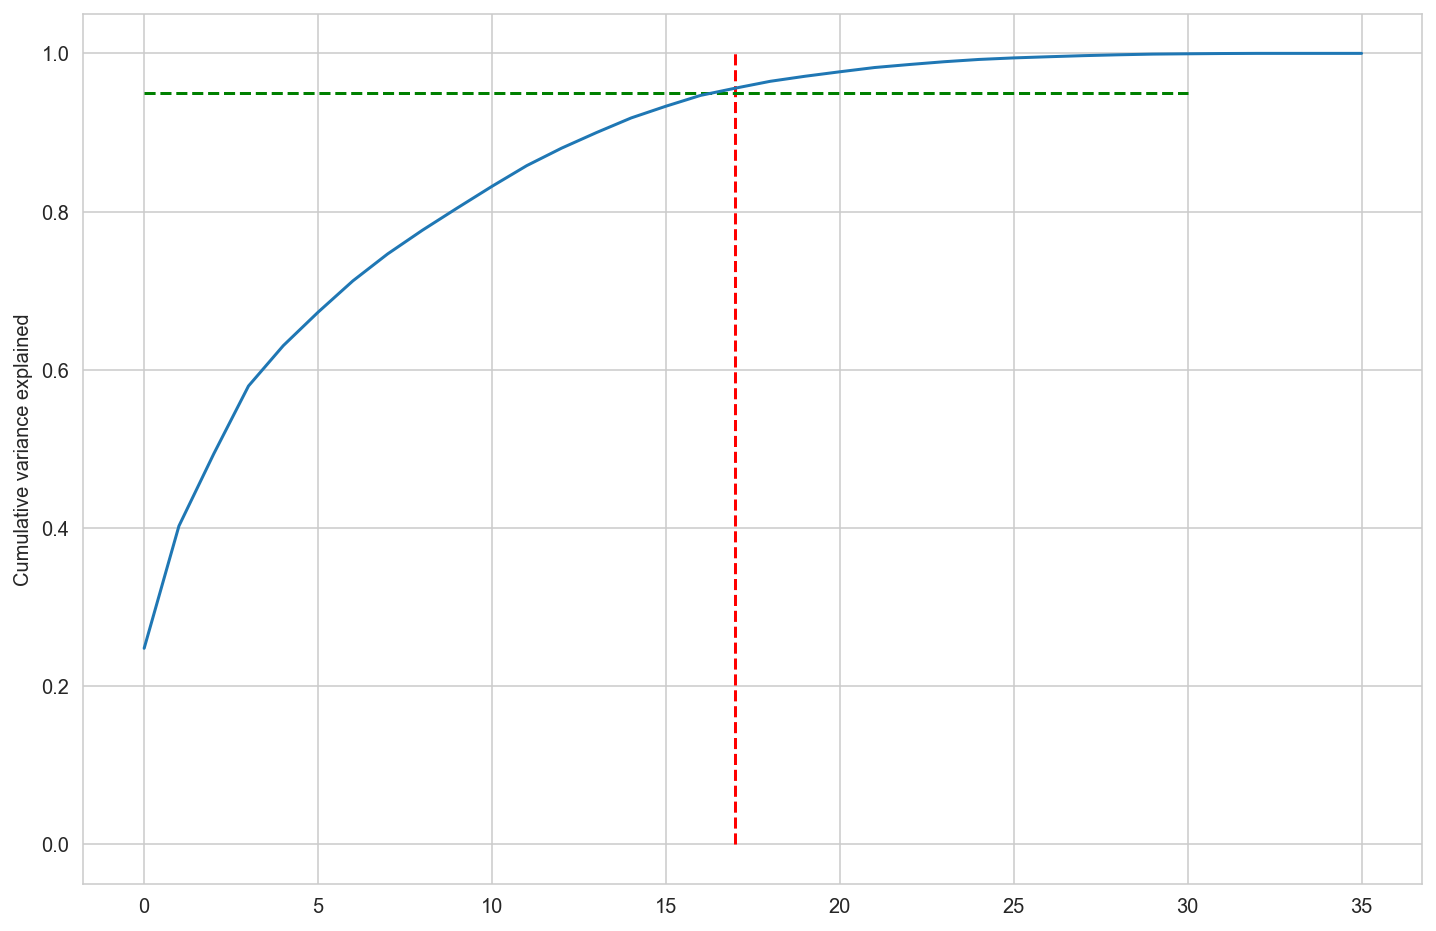

In [1808]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**lets choose 18 PCA components, as they explain 95% variance in the data.**

In [1809]:
#creating only 18 PCA components
pca_final = IncrementalPCA(n_components=18)

In [1810]:
# fit-transform o train data
X_train_balanced_pca = pca_final.fit_transform(X_train_balanced)

In [1811]:
# checking for changes
X_train_balanced_pca.shape

(3906, 18)

### preparing test data

In [1812]:
# applying transform on test data

X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [1813]:
# applying PCA Transformation
X_test_pca= pca_final.transform(X_test)
X_test_pca.shape

(6001, 18)

In [1814]:
# creating a dtaframe to keep record of model evaluation:
columns = ["Model_Name","Recall_Train","Recall_Test","Accuracy_Train","Accuracy_Test","Precision_Train",
"Precision_Test"]


evaluation_df = pd.DataFrame(columns=columns)

In [1815]:
## creating function to keep record of model evaluation



def evaluation(model:str,y_train_pred, y_test_pred, y_train=y_train_balanced, y_test=y_test ):
    
    
    
    
    x = {"Model_Name":model, 
                      "Recall_Train": recall_score(y_train, y_train_pred),
                      "Recall_Test":recall_score(y_test, y_test_pred),
                      "Accuracy_Train":accuracy_score(y_train, y_train_pred),
                      "Accuracy_Test":accuracy_score(y_test, y_test_pred),
                      "Precision_Train":precision_score(y_train, y_train_pred),
                      "Precision_Test":precision_score(y_test, y_test_pred)}
    
    return x


## Random Forest with PCA

## without hyper parameter tuning

In [1816]:
# lets try radomforest model without hyper-parameters

rf = RandomForestClassifier()

In [1817]:
# fitting the model
rf.fit(X_train_balanced_pca, y_train_balanced)

RandomForestClassifier()

In [1818]:
# predection on train side
y_train_pred = rf.predict(X_train_balanced_pca)

In [1819]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1953
           1       1.00      1.00      1.00      1953

    accuracy                           1.00      3906
   macro avg       1.00      1.00      1.00      3906
weighted avg       1.00      1.00      1.00      3906



In [1820]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred)

Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0


In [1821]:
# predecting on test side
y_pred_test = rf.predict(X_test_pca)

In [1822]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5513
           1       0.26      0.79      0.39       488

    accuracy                           0.80      6001
   macro avg       0.62      0.80      0.64      6001
weighted avg       0.92      0.80      0.84      6001



In [1823]:
# evaluation on test side
evaluate_model(y_test,y_pred_test)

Accuracy Score :  80.19
ROC AUC score :  79.69
Precision score :  26.21
Recall score :  79.1


**as we can see model is completely overfitting the training data**

## RandomForest with hyper parameter tuning

In [1401]:
classifier_rf = RandomForestClassifier(n_jobs=-1)

In [1402]:
params = {
    'max_depth': [3,5,10],
    'min_samples_leaf': [25,30,35],
    'n_estimators': [ 15,20, 25],
    'max_features' : ["auto", "sqrt", "log2"],
    'class_weight':[{1:1,0:0.35},{1:1,0:0.5}]
    
    
    
}

In [1403]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall",return_train_score=True)

In [1404]:
%%time
grid_search.fit(X_train_balanced_pca, y_train_balanced)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.3min finished


Wall time: 2min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.35, 1: 1}, {0: 0.5, 1: 1}],
                         'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [25, 30, 35],
                         'n_estimators': [15, 20, 25]},
             return_train_score=True, scoring='recall', verbose=1)

In [1405]:
rf_best = grid_search.best_estimator_

In [1406]:
# best estimator
rf_best

RandomForestClassifier(class_weight={0: 0.35, 1: 1}, max_depth=3,
                       max_features='sqrt', min_samples_leaf=35,
                       n_estimators=20, n_jobs=-1)

In [1407]:
# best score
grid_search.best_score_

0.9815673158895665

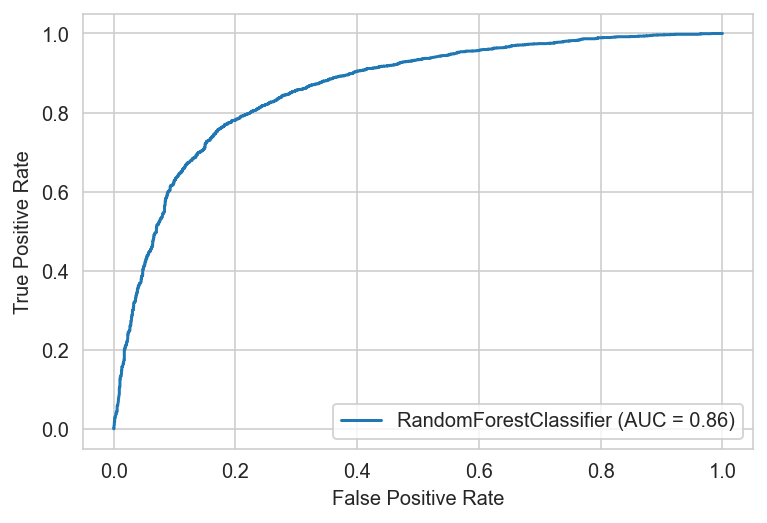

In [1408]:
# ROC-AUC curve
plot_roc_curve(rf_best, X_train_balanced_pca, y_train_balanced)
plt.show()

**AUC is 0.86, which indicates model with good predection power.**

In [1824]:
# applying parameter to random forest model

rf = RandomForestClassifier(class_weight={0: 0.35, 1: 1}, max_depth=3,
                       max_features='sqrt', min_samples_leaf=35,
                       n_estimators=20, n_jobs=-1)

In [1825]:
# fitting the model

rf.fit(X_train_balanced_pca, y_train_balanced)

RandomForestClassifier(class_weight={0: 0.35, 1: 1}, max_depth=3,
                       max_features='sqrt', min_samples_leaf=35,
                       n_estimators=20, n_jobs=-1)

In [1826]:
# predection on train side

y_train_pred = rf.predict(X_train_balanced_pca)

In [1827]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.23      0.37      1953
           1       0.56      0.98      0.71      1953

    accuracy                           0.61      3906
   macro avg       0.74      0.61      0.54      3906
weighted avg       0.74      0.61      0.54      3906



In [1828]:
# evaluation on train side

evaluate_model(y_train_balanced,y_train_pred)

Accuracy Score :  60.52
ROC AUC score :  60.52
Precision score :  56.01
Recall score :  98.0


In [1829]:
# predecting on test side

y_pred_test = rf.predict(X_test_pca)

In [1830]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.22      0.36      5513
           1       0.10      0.98      0.18       488

    accuracy                           0.28      6001
   macro avg       0.55      0.60      0.27      6001
weighted avg       0.92      0.28      0.34      6001



In [1831]:
# evaluation on test side

evaluate_model(y_test,y_pred_test)

Accuracy Score :  28.03
ROC AUC score :  59.9
Precision score :  9.99
Recall score :  97.95


In [1832]:
eval_dict = evaluation(model="RandomForest",y_train_pred=y_train_pred, y_test_pred=y_pred_test)

In [1833]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

,Model_Name,Recall_Train,Recall_Test,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test
0,RandomForest,0.980031,0.979508,0.605223,0.280287,0.56014,0.099854


## Logistic Regression With PCA

In [1834]:
# lets try logistic regression model without hyper-parameter tuning.

log = LogisticRegression()

In [1835]:
# fitting the model
log.fit(X_train_balanced_pca, y_train_balanced)

LogisticRegression()

In [1836]:
# predection on train side
y_train_pred_log = log.predict(X_train_balanced_pca)

In [1837]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1953
           1       0.78      0.79      0.79      1953

    accuracy                           0.79      3906
   macro avg       0.79      0.79      0.79      3906
weighted avg       0.79      0.79      0.79      3906



In [1838]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred_log)

Accuracy Score :  78.57
ROC AUC score :  78.57
Precision score :  78.41
Recall score :  78.85


In [1839]:
# predecting on test side
y_pred_test_log = log.predict(X_test_pca)

In [1840]:
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5513
           1       0.24      0.78      0.37       488

    accuracy                           0.78      6001
   macro avg       0.61      0.78      0.62      6001
weighted avg       0.92      0.78      0.82      6001



In [1841]:
# evaluation on test side
evaluate_model(y_test,y_pred_test_log)

Accuracy Score :  77.8
ROC AUC score :  78.11
Precision score :  23.79
Recall score :  78.48


### with hyper parameter tuning

In [1421]:
classifier_log = LogisticRegression(n_jobs=-1)

In [1422]:
params = [{
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'C': [0.1,0.2,0.3, 0.5, 0.7, 1],
    'penalty': ['l2','l1'],
    'class_weight':[{1:1,0:0.35},{1:1,0:0.5},{1:1,0:0.7}]
    },{
    'solver': ['liblinear','saga'],
    'C': [0.2,0.3,0.4, 0.5, 0.7, 1],
    'penalty': ['l1','l2'],
    'class_weight':[{1:1,0:0.35},{1:1,0:0.5},{1:1,0:0.7}]
}]

In [1423]:
# Instantiate the grid search model
grid_search_log = GridSearchCV(estimator=classifier_log, param_grid=params, 
                          cv=10, n_jobs=-1, verbose=1, scoring = "recall")

In [1424]:
%%time
grid_search_log.fit(X_train_balanced_pca, y_train_balanced)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1793 out of 1800 | elapsed:   40.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   40.3s finished


Wall time: 40.5 s


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 0.7, 1],
                          'class_weight': [{0: 0.35, 1: 1}, {0: 0.5, 1: 1},
                                           {0: 0.7, 1: 1}],
                          'penalty': ['l2', 'l1'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [0.2, 0.3, 0.4, 0.5, 0.7, 1],
                          'class_weight': [{0: 0.35, 1: 1}, {0: 0.5, 1: 1},
                                           {0: 0.7, 1: 1}],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             scoring='recall', verbose=1)

In [1425]:
# best estimator

log_best = grid_search_log.best_estimator_

In [1426]:
log_best

LogisticRegression(C=0.1, class_weight={0: 0.35, 1: 1}, n_jobs=-1,
                   solver='newton-cg')

In [1427]:
# best score

grid_search_log.best_score_

0.9160334903192047

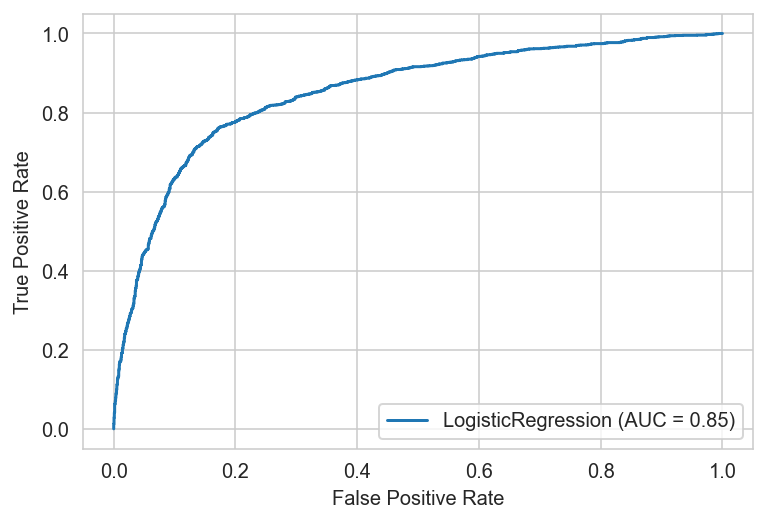

In [1428]:
plot_roc_curve(log_best, X_train_balanced_pca, y_train_balanced)
plt.show()

**AUC is 0.85, which indicates model with good predection power.**

In [1842]:
# applying parameter to logistic regression model
log = LogisticRegression(C=0.1, class_weight={0: 0.35, 1: 1}, n_jobs=-1,
                   solver='newton-cg')

In [1843]:
# fitting the model
log.fit(X_train_balanced_pca, y_train_balanced)

LogisticRegression(C=0.1, class_weight={0: 0.35, 1: 1}, n_jobs=-1,
                   solver='newton-cg')

In [1844]:
# predection on train side
y_train_pred_log = log.predict(X_train_balanced_pca)

In [1845]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.49      0.63      1953
           1       0.64      0.92      0.76      1953

    accuracy                           0.71      3906
   macro avg       0.75      0.71      0.69      3906
weighted avg       0.75      0.71      0.69      3906



In [1846]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred_log)

Accuracy Score :  70.53
ROC AUC score :  70.53
Precision score :  64.45
Recall score :  91.6


In [1847]:
# predecting on test side
y_pred_test_log = log.predict(X_test_pca)

In [1848]:
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.99      0.48      0.65      5513
           1       0.14      0.93      0.24       488

    accuracy                           0.52      6001
   macro avg       0.56      0.71      0.44      6001
weighted avg       0.92      0.52      0.61      6001



In [1849]:
# evaluation on test side
evaluate_model(y_test,y_pred_test_log)

Accuracy Score :  51.81
ROC AUC score :  70.6
Precision score :  13.71
Recall score :  93.03


In [1850]:
eval_dict = evaluation(model="Logistic Regression",y_train_pred=y_train_pred_log, y_test_pred=y_pred_test_log)

In [1851]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

,Model_Name,Recall_Train,Recall_Test,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test
0,RandomForest,0.980031,0.979508,0.605223,0.280287,0.560140,0.099854
1,Logistic Regression,0.916027,0.930328,0.705325,0.518080,0.644452,0.137077


## XGBoost With PCA

In [1852]:
# XGBoost model without any hyper parameter tuning

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train_balanced_pca, y_train_balanced)

XGBClassifier()

In [1853]:
# predection on train side
y_train_pred_xg = xgclf.predict(X_train_balanced_pca)

In [1854]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred_xg))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1953
           1       0.85      0.83      0.84      1953

    accuracy                           0.84      3906
   macro avg       0.84      0.84      0.84      3906
weighted avg       0.84      0.84      0.84      3906



In [1855]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred_xg)

Accuracy Score :  83.82
ROC AUC score :  83.82
Precision score :  84.6
Recall score :  82.69


In [1856]:
# predecting on test side
y_pred_test_xg = xgclf.predict(X_test_pca)

In [1857]:
print(classification_report(y_test,y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5513
           1       0.25      0.78      0.38       488

    accuracy                           0.79      6001
   macro avg       0.61      0.79      0.63      6001
weighted avg       0.92      0.79      0.84      6001



In [1858]:
# evaluation on test side
evaluate_model(y_test,y_pred_test_xg)

Accuracy Score :  79.44
ROC AUC score :  79.0
Precision score :  25.33
Recall score :  78.48


### With hyper parameter tuning

In [881]:
xgb_model = xgb.XGBClassifier()

In [882]:
parameters = {'learning_rate': [0.01,0.05,0.1,0.5],
              'max_depth': [12,15,20],
              'min_child_weight': [5,8,10],
              'n_estimators': [100,125,150],
              'gamma':[1,5,10],
              'scale_pos_weight':[5,10,20],}


In [883]:
# parameters

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring="recall",
                                       refit=True, verbose=1)

In [884]:
clf_xgb.fit(X_train_balanced_pca, y_train_balanced)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed: 29.1min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [1, 5, 10], 'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [12, 15, 20],
                         'min_child_weight': [5, 8, 10],
                         'n_estimators': [100, 125, 150],
                         'scale_pos_weight': [5, 10, 20]},
             scoring='recall', verbose=1)

In [885]:
# best estimator
xg_best = clf_xgb.best_estimator_

In [886]:
xg_best

XGBClassifier(gamma=10, learning_rate=0.05, max_depth=12, min_child_weight=10,
              scale_pos_weight=20)

In [887]:
clf_xgb.best_score_

0.9359959037378393

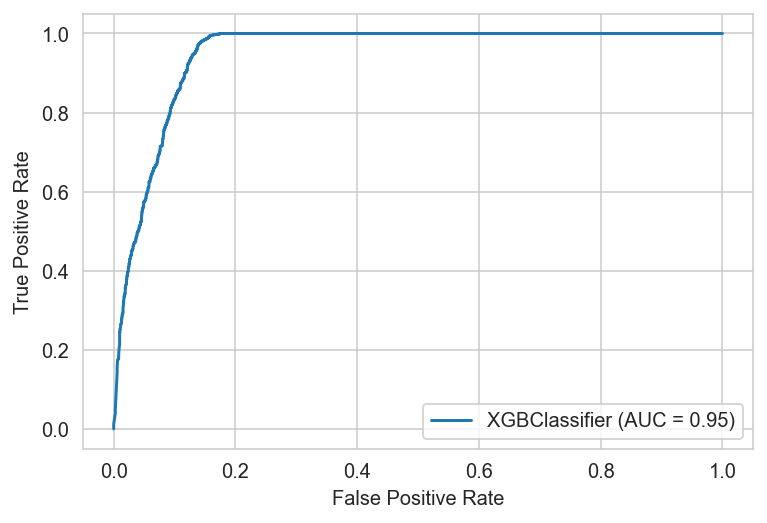

In [888]:
plot_roc_curve(xg_best, X_train_balanced_pca, y_train_balanced)
plt.show()

**AUC is 0.95, which indicates model with good predection power.**

In [1859]:
# applying parameter to XGBoost model
xg = xgb.XGBClassifier(gamma=10, learning_rate=0.01, max_depth=12, min_child_weight=10,
              scale_pos_weight=20)

In [1860]:
# fitting the model
xg.fit(X_train_balanced_pca, y_train_balanced)

XGBClassifier(gamma=10, learning_rate=0.01, max_depth=12, min_child_weight=10,
              scale_pos_weight=20)

In [1861]:
# predection on train side
y_train_pred_xg = xg.predict(X_train_balanced_pca)

In [1862]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61      1953
           1       0.64      1.00      0.78      1953

    accuracy                           0.72      3906
   macro avg       0.82      0.72      0.70      3906
weighted avg       0.82      0.72      0.70      3906



In [1863]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred_xg)

Accuracy Score :  72.12
ROC AUC score :  72.12
Precision score :  64.2
Recall score :  100.0


In [1864]:
# predecting on test side
y_pred_test_xg = xg.predict(X_test_pca)

In [1865]:
print(classification_report(y_test,y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53      5513
           1       0.12      0.96      0.21       488

    accuracy                           0.41      6001
   macro avg       0.55      0.66      0.37      6001
weighted avg       0.92      0.41      0.50      6001



In [1866]:
# evaluation on test side
evaluate_model(y_test,y_pred_test_xg)

Accuracy Score :  40.64
ROC AUC score :  65.92
Precision score :  11.69
Recall score :  96.11


In [1867]:
confusion_matrix(y_test,y_pred_test_xg)

array([[1970, 3543],
       [  19,  469]], dtype=int64)

In [1868]:
eval_dict = evaluation(model="XGBoost",y_train_pred=y_train_pred_xg, y_test_pred=y_pred_test_xg)

In [1869]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

,Model_Name,Recall_Train,Recall_Test,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test
0,RandomForest,0.980031,0.979508,0.605223,0.280287,0.560140,0.099854
1,Logistic Regression,0.916027,0.930328,0.705325,0.518080,0.644452,0.137077
2,XGBoost,1.000000,0.961066,0.721198,0.406432,0.642012,0.116899


## support vector machine

#### without hyper parameter tuning

In [1870]:
# SVC with default parameters
svm = SVC()

In [1871]:
# fitting svm model on traing data
svm.fit(X_train_balanced_pca,y_train_balanced)

SVC()

In [1872]:
# predection on train side
y_train_pred_svm = svm.predict(X_train_balanced_pca)

In [1873]:
# evaluting model performance on train side
evaluate_model(y_train_balanced, y_train_pred_svm)

Accuracy Score :  83.05
ROC AUC score :  83.05
Precision score :  84.54
Recall score :  80.9


In [1874]:
# predection on test side
y_test_pred_svm = svm.predict(X_test_pca)

In [1875]:
# evaluting model performance on train side
evaluate_model(y_test, y_test_pred_svm)

Accuracy Score :  81.59
ROC AUC score :  79.52
Precision score :  27.47
Recall score :  77.05


### with hyper parameter tuning

In [1876]:
# specify model
model_svm = SVC(kernel="rbf")

In [1877]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],
                'class_weight':[{1:1,0:0.5},{1:1,0:0.6},{1:1,0:0.7}]}
               ]

In [1459]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_svm, 
                        param_grid = hyper_params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)   

In [1460]:
# fit the model

model_cv.fit(X_train_balanced_pca, y_train_balanced)                  

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [{0: 0.5, 1: 1}, {0: 0.6, 1: 1},
                                           {0: 0.7, 1: 1}],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='f1', verbose=1)

In [1461]:
# best estimator
svm_best = model_cv.best_estimator_

In [1462]:
svm_best

SVC(C=1, class_weight={0: 0.6, 1: 1}, gamma=0.01)

In [1463]:
model_cv.best_score_

0.800763409537757

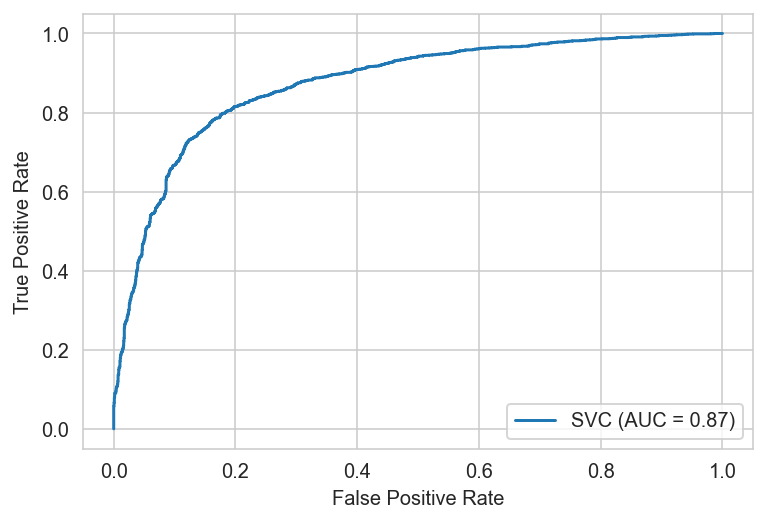

In [1464]:
plot_roc_curve(svm_best, X_train_balanced_pca, y_train_balanced)
plt.show()

**AUC is 0.87, which indicates model with good predection power.**

In [1878]:
# applying parameter to XGBoost model
svm = SVC(C=1, class_weight={0: 0.6, 1: 1}, gamma=0.01)

In [1879]:
# fitting the model
svm.fit(X_train_balanced_pca, y_train_balanced)

SVC(C=1, class_weight={0: 0.6, 1: 1}, gamma=0.01)

In [1880]:
# predection on train side
y_train_pred_svm = svm.predict(X_train_balanced_pca)

In [1881]:
print(classification_report(y_true= y_train_balanced, y_pred=y_train_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1953
           1       0.76      0.85      0.81      1953

    accuracy                           0.79      3906
   macro avg       0.80      0.79      0.79      3906
weighted avg       0.80      0.79      0.79      3906



In [1882]:
# evaluation on train side
evaluate_model(y_train_balanced,y_train_pred_svm)

Accuracy Score :  79.42
ROC AUC score :  79.42
Precision score :  76.39
Recall score :  85.15


In [1883]:
# predecting on test side
y_pred_test_svm = svm.predict(X_test_pca)

In [1884]:
print(classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      5513
           1       0.21      0.84      0.34       488

    accuracy                           0.73      6001
   macro avg       0.60      0.78      0.58      6001
weighted avg       0.92      0.73      0.79      6001



In [1885]:
# evaluation on test side
evaluate_model(y_test,y_pred_test_svm)

Accuracy Score :  72.87
ROC AUC score :  78.04
Precision score :  20.95
Recall score :  84.22


In [1886]:
eval_dict = evaluation(model="SVM",y_train_pred=y_train_pred_svm, y_test_pred=y_pred_test_svm)

In [1887]:
evaluation_df = evaluation_df.append(eval_dict,ignore_index=True)
evaluation_df

,Model_Name,Recall_Train,Recall_Test,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test
0,RandomForest,0.980031,0.979508,0.605223,0.280287,0.560140,0.099854
1,Logistic Regression,0.916027,0.930328,0.705325,0.518080,0.644452,0.137077
2,XGBoost,1.000000,0.961066,0.721198,0.406432,0.642012,0.116899
3,SVM,0.851510,0.842213,0.794163,0.728712,0.763895,0.209480


- **from above predective model we found Random Forest having a high recall of approximately 98%.** 

- **XG boost also having recall score with 96% and having a better test accuracy.also having AUC of 0.95.**

- **Logistic regression and SVM having recall respectively 93% and 84%. SVM having high Test accuracy of 72%. all the model have poor precision.**

- **we can select RandomForest model as it have high Recall 98% on test side.**